<a href="https://colab.research.google.com/github/baalasangar/MLAI/blob/master/06_UnsupervisedLearning/Assignment/unsupervised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importing Liberaries

In [79]:
import pandas as pd 
pd.set_option('display.max_columns', None)

import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
#%matplotlib inline
sns.set(style="whitegrid")

# Feature Engineering
from sklearn.preprocessing import StandardScaler

#pip install missingno
import missingno as msno # package to visualize the missing values 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

from sklearn.svm import SVC

from sklearn.decomposition import PCA

import warnings 
warnings.filterwarnings('ignore')

#### Reading Data

In [80]:
data = pd.read_csv("vehicle.csv")
data.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [81]:
data.columns = data.columns.str.replace(".","_")
data.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr_axis_aspect_ratio', 'max_length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr_axis_rectangularity', 'max_length_rectangularity',
       'scaled_variance', 'scaled_variance_1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration_1', 'skewness_about', 'skewness_about_1',
       'skewness_about_2', 'hollows_ratio', 'class'],
      dtype='object')

In [82]:
data.shape

(846, 19)

#### Exploratory Data analysis

##### Checking Missing Values - Null Values


In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr_axis_aspect_ratio         844 non-null    float64
 5   max_length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr_axis_rectangularity       843 non-null    float64
 9   max_length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance_1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

Missing Values Count by Features 
 compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr_axis_aspect_ratio           2
max_length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr_axis_rectangularity         3
max_length_rectangularity      0
scaled_variance                3
scaled_variance_1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration_1    4
skewness_about                 6
skewness_about_1               1
skewness_about_2               1
hollows_ratio                  0
class                          0
dtype: int64


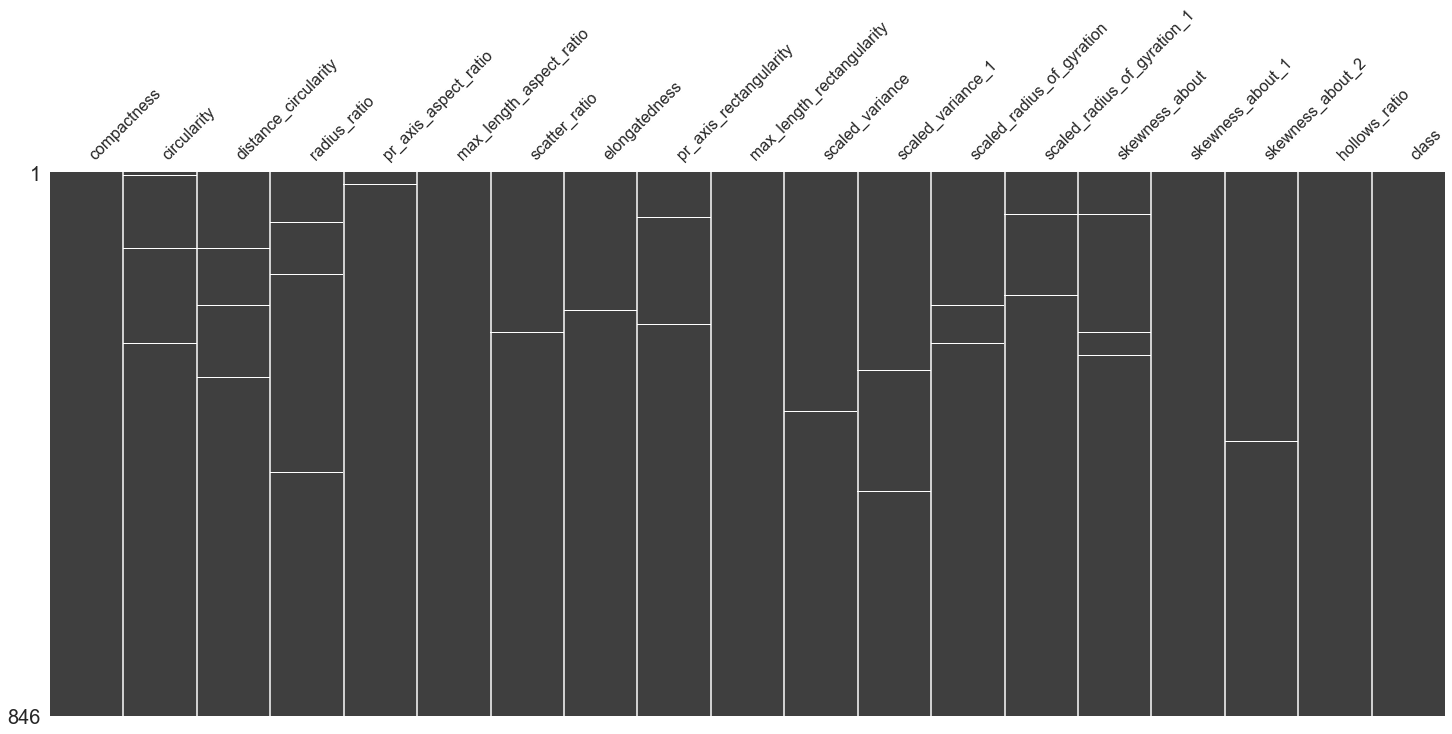

In [84]:
print("Missing Values Count by Features","\n",data.isnull().sum())
msno.matrix(data,sparkline=False);

In [85]:
print("Missing values in % - ",round((((data.shape[0] - data.dropna().shape[0] )/ data.shape[0])*100),0))

Missing values in % -  4.0


**Observation** 


*   4 % of the observation has value missing
*   From the visualization -  no relationship between the data missing and any other values, observed or missing, within the dataset **(Missing data completely at random ( MACR )**) 
*   Two ways of handling it
    - remove all the observation with atleast one missing value
    - Imputation tech ( Median/Mean/Mode) can be used to fill the value


In [86]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
compactness,846,NaN,NaN,NaN,93.6785,8.23447,73,87,93,100,119
circularity,841,NaN,NaN,NaN,44.8288,6.15217,33,40,44,49,59
distance_circularity,842,NaN,NaN,NaN,82.1105,15.7783,40,70,80,98,112
radius_ratio,840,NaN,NaN,NaN,168.888,33.5202,104,141,167,195,333
pr_axis_aspect_ratio,844,NaN,NaN,NaN,61.6789,7.89146,47,57,61,65,138
max_length_aspect_ratio,846,NaN,NaN,NaN,8.56738,4.60122,2,7,8,10,55
scatter_ratio,845,NaN,NaN,NaN,168.902,33.2148,112,147,157,198,265
elongatedness,845,NaN,NaN,NaN,40.9337,7.81619,26,33,43,46,61
pr_axis_rectangularity,843,NaN,NaN,NaN,20.5824,2.59293,17,19,20,23,29
max_length_rectangularity,846,NaN,NaN,NaN,147.999,14.5157,118,137,146,159,188


##### Impute Missing values

In [87]:
data_imp = data.copy()
# list all the variables which has missing values and need to be treated
print(data_imp.columns[data_imp.isnull().any()])

Index(['circularity', 'distance_circularity', 'radius_ratio',
       'pr_axis_aspect_ratio', 'scatter_ratio', 'elongatedness',
       'pr_axis_rectangularity', 'scaled_variance', 'scaled_variance_1',
       'scaled_radius_of_gyration', 'scaled_radius_of_gyration_1',
       'skewness_about', 'skewness_about_1', 'skewness_about_2'],
      dtype='object')


In [88]:
def median_impute(data_imp,column_name,missing_value):
  median_van = data_imp[column_name][data_imp["class"] == "van"].median()
  median_bus = data_imp[column_name][data_imp["class"] == "bus"].median()
  median_car = data_imp[column_name][data_imp["class"] == "car"].median()
  condition = [data_imp.loc[missing_value,"class"] == "bus",data_imp.loc[missing_value,"class"] == "van",data_imp.loc[missing_value,"class"] == "car"]
  condition_value = [median_bus,median_van,median_car]
  data_imp.loc[missing_value,column_name] = np.select(condition,condition_value)

def dist_compare(data,data_impu,column_name,hue_column):
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
    #sns.histplot(data=data,x=column_name,kde=True,ax=ax[0],bins=10)
    sns.histplot(data=data,x=column_name,hue=hue_column,kde=True,ax=ax[0])
    #ax[0].title("orignal Data")
    sns.histplot(data=data_impu,x=column_name,hue=hue_column,kde=True,ax=ax[1])
    #ax[1].title("Imputed Data")
    #sm.qqplot(data[column_name],ax=ax[2],line='45',fit=True)
    ax[1].set_xlabel(column_name+"_Imputed")    
    fig.suptitle("{} - {}".format("Distribution for ",column_name))
    plt.show() 


###### circularity

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
105,108,NaN,103.0,202.0,64.0,10,220.0,30.0,25.0,168,NaN,711.0,214.0,73.0,11.0,NaN,188.0,199,car
118,85,NaN,NaN,128.0,56.0,8,150.0,46.0,19.0,144,168.0,324.0,173.0,82.0,9.0,14.0,180.0,184,bus
266,86,NaN,65.0,116.0,53.0,6,152.0,45.0,19.0,141,175.0,335.0,NaN,85.0,5.0,4.0,179.0,183,bus
396,108,NaN,106.0,177.0,51.0,5,256.0,26.0,28.0,170,285.0,966.0,261.0,87.0,11.0,2.0,182.0,181,bus


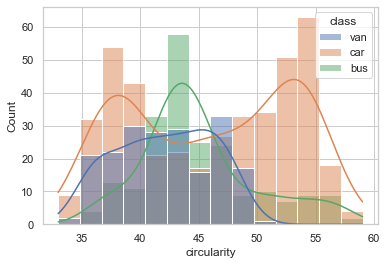

In [89]:
column_name = "circularity"
sns.histplot(data=data,x=column_name,hue="class",kde=True)
data_imp[data_imp[column_name].isnull()]

Observation :


*   5 Observation has NaN for "circularity" out of it 4 observation belong to Bus
*  From Histogram, 
    - Bimodel distribution for the "Car" Class, so mean/Median imputation will not work good. Observation (105) can be removed. 









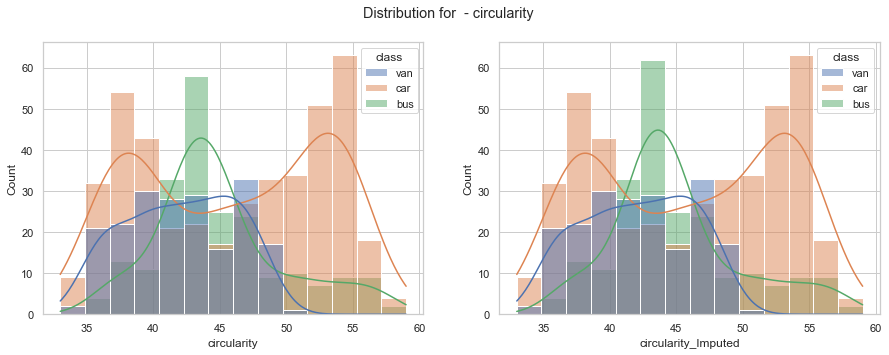

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
5,107,44.0,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
118,85,44.0,NaN,128.0,56.0,8,150.0,46.0,19.0,144,168.0,324.0,173.0,82.0,9.0,14.0,180.0,184,bus
266,86,44.0,65.0,116.0,53.0,6,152.0,45.0,19.0,141,175.0,335.0,NaN,85.0,5.0,4.0,179.0,183,bus
396,108,44.0,106.0,177.0,51.0,5,256.0,26.0,28.0,170,285.0,966.0,261.0,87.0,11.0,2.0,182.0,181,bus


In [90]:
data_imp.drop([105],inplace=True)           
#data_imp[data_imp[column_name].isnull()]  

missing_value = data_imp[column_name].isnull()
median_impute(data_imp,column_name,missing_value)
dist_compare(data,data_imp,column_name,"class")

data_imp.loc[missing_value]

Observation - there is no impact on the distribution after impute





###### distance_circularity

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
35,100,46.0,NaN,172.0,67.0,9,157.0,43.0,20.0,150,170.0,363.0,184.0,67.0,17.0,7.0,192.0,200,van
118,85,44.0,NaN,128.0,56.0,8,150.0,46.0,19.0,144,168.0,324.0,173.0,82.0,9.0,14.0,180.0,184,bus
207,85,42.0,NaN,121.0,55.0,7,149.0,46.0,19.0,146,167.0,323.0,NaN,85.0,1.0,6.0,179.0,182,bus
319,102,51.0,NaN,194.0,60.0,6,220.0,30.0,25.0,162,247.0,731.0,209.0,80.0,7.0,7.0,188.0,186,bus


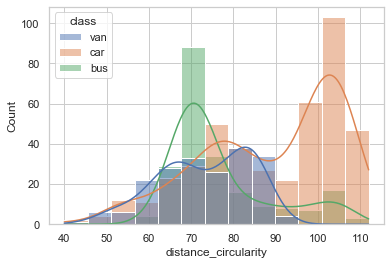

In [91]:
column_name = "distance_circularity"
sns.histplot(data=data,x=column_name,hue="class",kde=True)
data_imp[data_imp[column_name].isnull()]

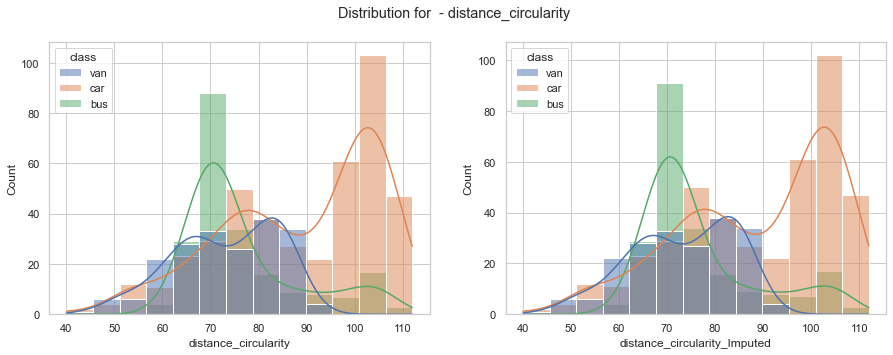

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
35,100,46.0,75.0,172.0,67.0,9,157.0,43.0,20.0,150,170.0,363.0,184.0,67.0,17.0,7.0,192.0,200,van
118,85,44.0,72.0,128.0,56.0,8,150.0,46.0,19.0,144,168.0,324.0,173.0,82.0,9.0,14.0,180.0,184,bus
207,85,42.0,72.0,121.0,55.0,7,149.0,46.0,19.0,146,167.0,323.0,NaN,85.0,1.0,6.0,179.0,182,bus
319,102,51.0,72.0,194.0,60.0,6,220.0,30.0,25.0,162,247.0,731.0,209.0,80.0,7.0,7.0,188.0,186,bus


In [92]:
missing_value = data_imp[column_name].isnull()
median_impute(data_imp,column_name,missing_value)
dist_compare(data,data_imp,column_name,"class")

data_imp.loc[missing_value]

Observation 
  - Missing values are replaced by the Median Value within the class
  - No impact in distribution after the impute. 

###### radius_ratio

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car
78,104,52.0,94.0,NaN,66.0,5,208.0,31.0,24.0,161,227.0,666.0,218.0,76.0,11.0,4.0,193.0,191,bus
159,91,45.0,75.0,NaN,57.0,6,150.0,44.0,19.0,146,170.0,335.0,180.0,66.0,16.0,2.0,193.0,198,car
287,88,43.0,84.0,NaN,55.0,11,154.0,44.0,19.0,150,174.0,350.0,164.0,73.0,6.0,2.0,185.0,196,van
345,101,54.0,106.0,NaN,57.0,7,236.0,28.0,26.0,164,256.0,833.0,253.0,81.0,6.0,14.0,185.0,185,bus
467,96,54.0,104.0,NaN,58.0,10,215.0,31.0,24.0,175,221.0,682.0,222.0,75.0,13.0,23.0,186.0,194,car


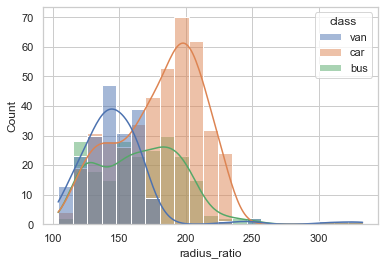

In [93]:
column_name = "radius_ratio"
sns.histplot(data=data,x=column_name,hue="class",kde=True)
data_imp[data_imp[column_name].isnull()]

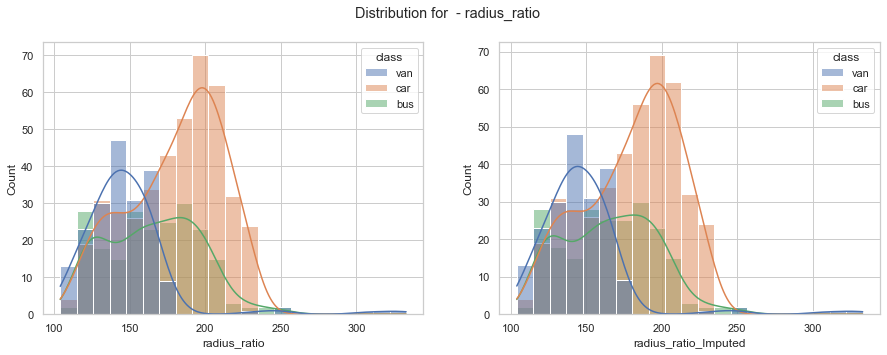

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
9,93,44.0,98.0,186.0,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car
78,104,52.0,94.0,167.5,66.0,5,208.0,31.0,24.0,161,227.0,666.0,218.0,76.0,11.0,4.0,193.0,191,bus
159,91,45.0,75.0,186.0,57.0,6,150.0,44.0,19.0,146,170.0,335.0,180.0,66.0,16.0,2.0,193.0,198,car
287,88,43.0,84.0,144.0,55.0,11,154.0,44.0,19.0,150,174.0,350.0,164.0,73.0,6.0,2.0,185.0,196,van
345,101,54.0,106.0,167.5,57.0,7,236.0,28.0,26.0,164,256.0,833.0,253.0,81.0,6.0,14.0,185.0,185,bus
467,96,54.0,104.0,186.0,58.0,10,215.0,31.0,24.0,175,221.0,682.0,222.0,75.0,13.0,23.0,186.0,194,car


In [94]:
missing_value = data_imp[column_name].isnull()
median_impute(data_imp,column_name,missing_value)
dist_compare(data,data_imp,column_name,"class")

data_imp.loc[missing_value]

Observation 
  - Missing values are replaced by the Median Value within the class
  - No impact in distribution after the impute. 

###### pr_axis_aspect_ratio

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
19,101,56.0,100.0,215.0,NaN,10,208.0,32.0,24.0,169,227.0,651.0,223.0,74.0,6.0,5.0,186.0,193,car
222,100,50.0,81.0,197.0,NaN,6,186.0,34.0,22.0,158,206.0,531.0,198.0,74.0,NaN,1.0,197.0,198,bus


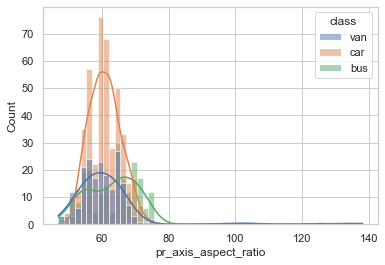

In [95]:
column_name = "pr_axis_aspect_ratio"
sns.histplot(data=data,hue="class",x=column_name,kde=True)
data_imp[data_imp[column_name].isnull()]

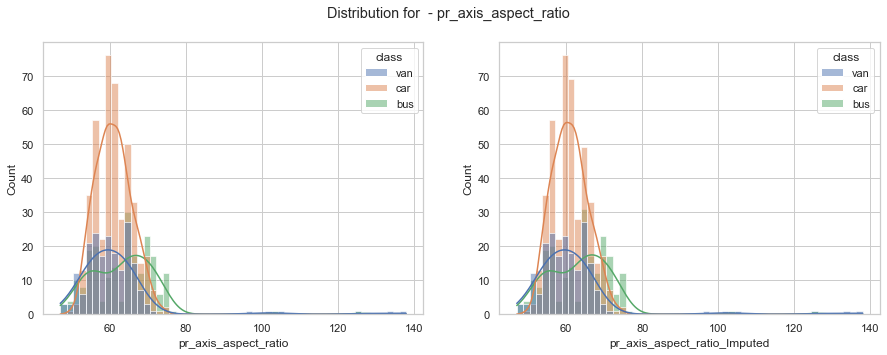

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
19,101,56.0,100.0,215.0,61.0,10,208.0,32.0,24.0,169,227.0,651.0,223.0,74.0,6.0,5.0,186.0,193,car
222,100,50.0,81.0,197.0,64.0,6,186.0,34.0,22.0,158,206.0,531.0,198.0,74.0,NaN,1.0,197.0,198,bus


In [96]:
missing_value = data_imp[column_name].isnull()
median_impute(data_imp,column_name,missing_value)
dist_compare(data,data_imp,column_name,"class")

data_imp.loc[missing_value]

###### scatter_ratio

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
249,85,34.0,53.0,127.0,58.0,6,NaN,58.0,17.0,121,137.0,197.0,127.0,70.0,NaN,20.0,185.0,189,car


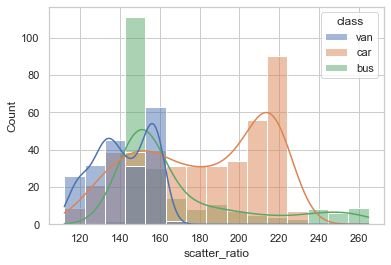

In [97]:
column_name = "scatter_ratio"
sns.histplot(data=data,hue="class",x=column_name,kde=True)
data_imp[data_imp[column_name].isnull()]

In [98]:
# Observation follows BiModel - Observation is removed.
data_imp.drop([249],inplace=True)

###### elongatedness


,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
215,90,39.0,86.0,169.0,62.0,7,162.0,NaN,20.0,131,194.0,388.0,147.0,74.0,1.0,22.0,185.0,191,car


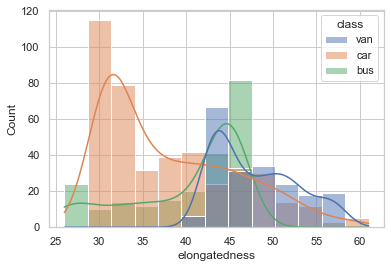

In [99]:
column_name = "elongatedness"
sns.histplot(data=data,hue="class",x=column_name,kde=True)
data_imp[data_imp[column_name].isnull()]

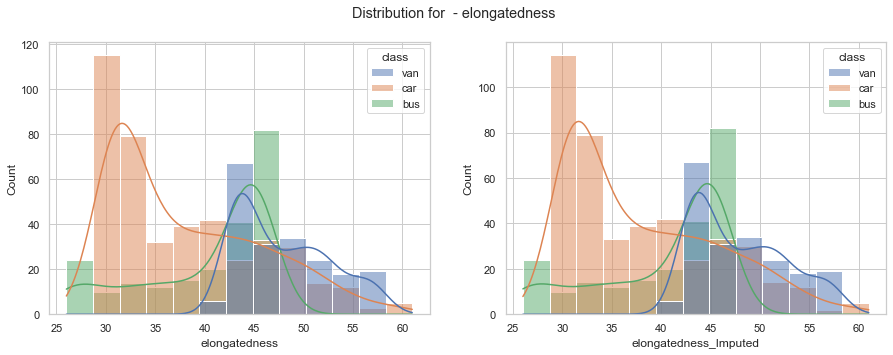

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
215,90,39.0,86.0,169.0,62.0,7,162.0,36.0,20.0,131,194.0,388.0,147.0,74.0,1.0,22.0,185.0,191,car


In [100]:
# Replaced by Median Value 
missing_value = data_imp[column_name].isnull()
median_impute(data_imp,column_name,missing_value)
dist_compare(data,data_imp,column_name,"class")

data_imp.loc[missing_value]


###### pr_axis_rectangularity

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
70,96,55.0,98.0,161.0,54.0,10,215.0,31.0,NaN,175,226.0,683.0,221.0,76.0,3.0,6.0,185.0,193,car
237,85,45.0,65.0,128.0,56.0,8,151.0,45.0,NaN,145,170.0,332.0,186.0,81.0,1.0,10.0,179.0,184,bus
273,96,45.0,80.0,162.0,63.0,9,146.0,46.0,NaN,148,161.0,316.0,161.0,64.0,5.0,10.0,199.0,207,van


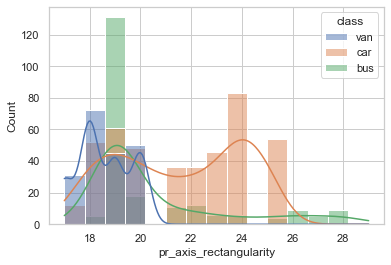

In [101]:
column_name = "pr_axis_rectangularity"
sns.histplot(data=data,hue="class",x=column_name,kde=True)
data_imp[data_imp[column_name].isnull()]

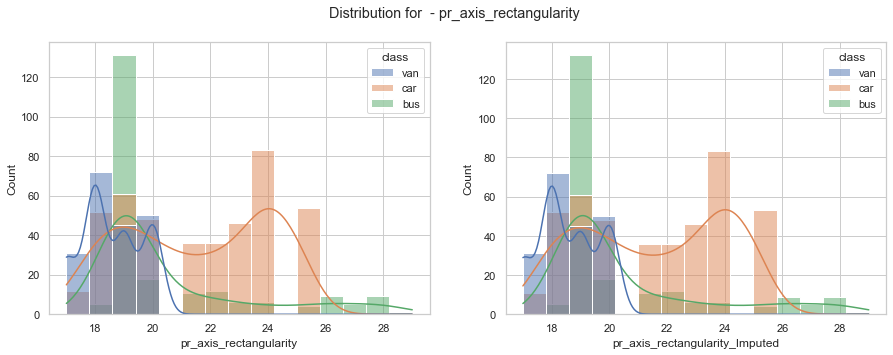

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
237,85,45.0,65.0,128.0,56.0,8,151.0,45.0,19.0,145,170.0,332.0,186.0,81.0,1.0,10.0,179.0,184,bus


In [102]:
#Removed the Observation of "van" & "Car"
data_imp.drop([70,273],inplace=True)

# Replaced by Median Value 
missing_value = data_imp[column_name].isnull()
median_impute(data_imp,column_name,missing_value)
dist_compare(data,data_imp,column_name,"class")

data_imp.loc[missing_value]


###### scaled_variance

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
372,97,47.0,87.0,164.0,64.0,9,156.0,43.0,20.0,149,NaN,359.0,182.0,68.0,1.0,13.0,192.0,202,van
522,89,36.0,69.0,162.0,63.0,6,140.0,48.0,18.0,131,NaN,291.0,126.0,66.0,1.0,38.0,193.0,204,car


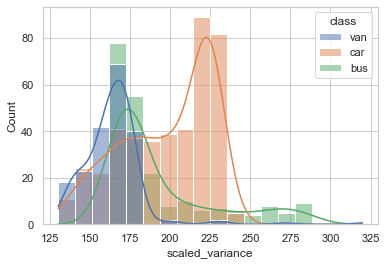

In [103]:
column_name = "scaled_variance"
sns.histplot(data=data,hue="class",x=column_name,kde=True)
data_imp[data_imp[column_name].isnull()]

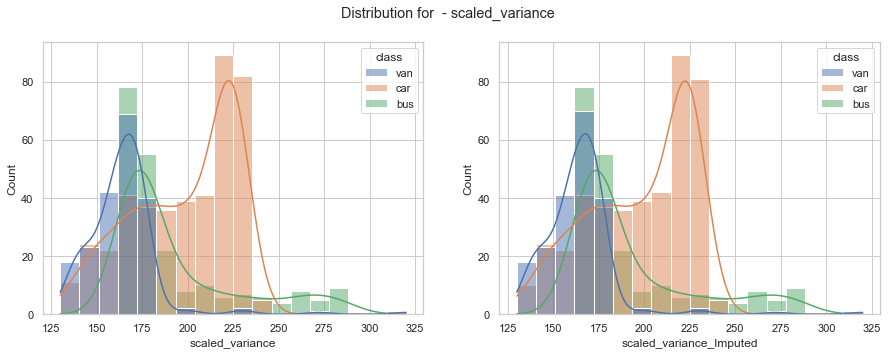

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
372,97,47.0,87.0,164.0,64.0,9,156.0,43.0,20.0,149,164.0,359.0,182.0,68.0,1.0,13.0,192.0,202,van
522,89,36.0,69.0,162.0,63.0,6,140.0,48.0,18.0,131,206.0,291.0,126.0,66.0,1.0,38.0,193.0,204,car


In [104]:
# Replaced by Median Value 
missing_value = data_imp[column_name].isnull()
median_impute(data_imp,column_name,missing_value)
dist_compare(data,data_imp,column_name,"class")

data_imp.loc[missing_value]

###### scaled_variance_1

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
308,109,51.0,100.0,197.0,59.0,10,192.0,34.0,22.0,161,210.0,NaN,195.0,64.0,14.0,3.0,196.0,202,car
496,106,55.0,98.0,224.0,68.0,11,215.0,31.0,24.0,170,222.0,NaN,214.0,68.0,2.0,29.0,189.0,201,car


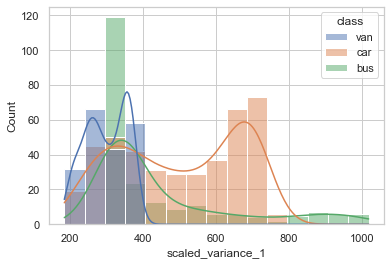

In [105]:
column_name = "scaled_variance_1"
sns.histplot(data=data,hue="class",x=column_name,kde=True)
data_imp[data_imp[column_name].isnull()]

In [106]:
#Removed the Observation of Car - due to its bimodel nature"
data_imp.drop([308,496],inplace=True)

###### scaled_radius_of_gyration

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
207,85,42.0,72.0,121.0,55.0,7,149.0,46.0,19.0,146,167.0,323.0,NaN,85.0,1.0,6.0,179.0,182,bus
266,86,44.0,65.0,116.0,53.0,6,152.0,45.0,19.0,141,175.0,335.0,NaN,85.0,5.0,4.0,179.0,183,bus


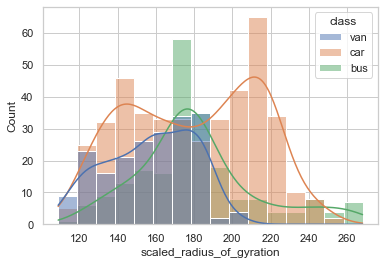

In [107]:
column_name = "scaled_radius_of_gyration"
sns.histplot(data=data,hue="class",x=column_name,kde=True)
data_imp[data_imp[column_name].isnull()]

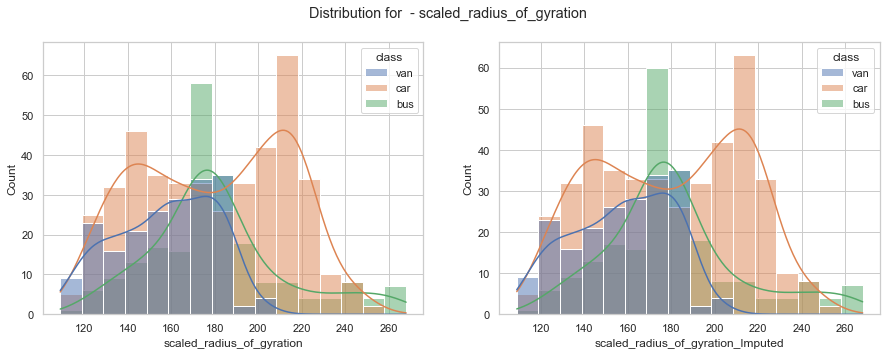

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
207,85,42.0,72.0,121.0,55.0,7,149.0,46.0,19.0,146,167.0,323.0,176.0,85.0,1.0,6.0,179.0,182,bus
266,86,44.0,65.0,116.0,53.0,6,152.0,45.0,19.0,141,175.0,335.0,176.0,85.0,5.0,4.0,179.0,183,bus


In [108]:
# Replaced by Median Value 
missing_value = data_imp[column_name].isnull()
median_impute(data_imp,column_name,missing_value)
dist_compare(data,data_imp,column_name,"class")

data_imp.loc[missing_value]

###### scaled_radius_of_gyration_1

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
66,81,43.0,68.0,125.0,57.0,8,149.0,46.0,19.0,146,169.0,323.0,172.0,NaN,NaN,18.0,179.0,184,bus
77,86,40.0,62.0,140.0,62.0,7,150.0,45.0,19.0,133,165.0,330.0,173.0,NaN,2.0,3.0,180.0,185,car
192,93,43.0,76.0,149.0,57.0,7,149.0,44.0,19.0,143,172.0,335.0,176.0,NaN,14.0,0.0,189.0,194,car
329,89,38.0,80.0,169.0,59.0,7,161.0,41.0,20.0,131,186.0,389.0,137.0,NaN,5.0,15.0,192.0,197,car


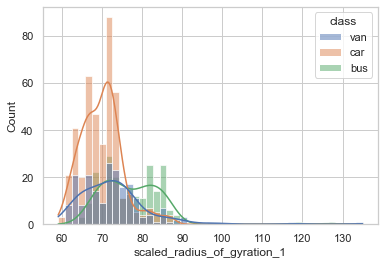

In [109]:
column_name = "scaled_radius_of_gyration_1"
sns.histplot(data=data,hue="class",x=column_name,kde=True)
data_imp[data_imp[column_name].isnull()]

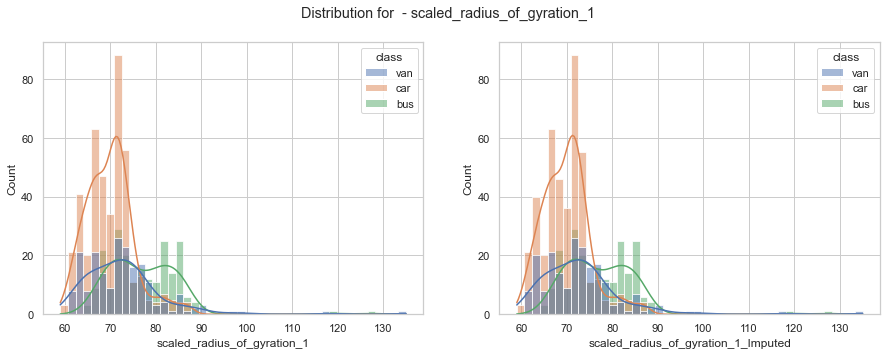

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
66,81,43.0,68.0,125.0,57.0,8,149.0,46.0,19.0,146,169.0,323.0,172.0,76.0,NaN,18.0,179.0,184,bus
77,86,40.0,62.0,140.0,62.0,7,150.0,45.0,19.0,133,165.0,330.0,173.0,70.0,2.0,3.0,180.0,185,car
192,93,43.0,76.0,149.0,57.0,7,149.0,44.0,19.0,143,172.0,335.0,176.0,70.0,14.0,0.0,189.0,194,car
329,89,38.0,80.0,169.0,59.0,7,161.0,41.0,20.0,131,186.0,389.0,137.0,70.0,5.0,15.0,192.0,197,car


In [110]:
# Replaced by Median Value 
missing_value = data_imp[column_name].isnull()
median_impute(data_imp,column_name,missing_value)
dist_compare(data,data_imp,column_name,"class")

data_imp.loc[missing_value]

###### skewness_about

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
66,81,43.0,68.0,125.0,57.0,8,149.0,46.0,19.0,146,169.0,323.0,172.0,76.0,NaN,18.0,179.0,184,bus
141,81,42.0,63.0,125.0,55.0,8,149.0,46.0,19.0,145,166.0,320.0,172.0,86.0,NaN,7.0,179.0,182,bus
177,89,44.0,72.0,160.0,66.0,7,144.0,46.0,19.0,147,166.0,312.0,169.0,69.0,NaN,1.0,191.0,198,bus
222,100,50.0,81.0,197.0,64.0,6,186.0,34.0,22.0,158,206.0,531.0,198.0,74.0,NaN,1.0,197.0,198,bus
285,89,48.0,85.0,189.0,64.0,8,169.0,39.0,20.0,153,188.0,427.0,190.0,64.0,NaN,5.0,195.0,201,car


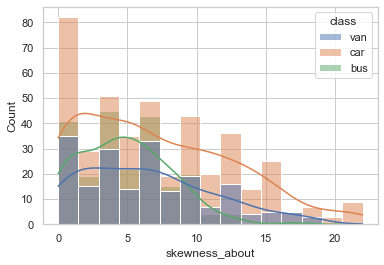

In [111]:
column_name = "skewness_about"
sns.histplot(data=data,hue="class",x=column_name,kde=True)
data_imp[data_imp[column_name].isnull()]

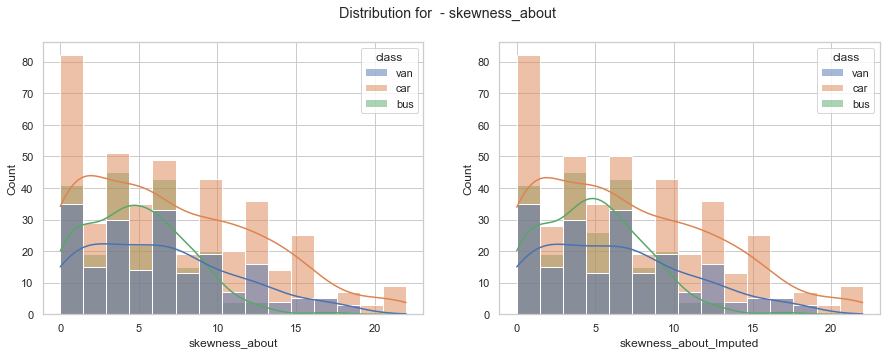

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
66,81,43.0,68.0,125.0,57.0,8,149.0,46.0,19.0,146,169.0,323.0,172.0,76.0,5.0,18.0,179.0,184,bus
141,81,42.0,63.0,125.0,55.0,8,149.0,46.0,19.0,145,166.0,320.0,172.0,86.0,5.0,7.0,179.0,182,bus
177,89,44.0,72.0,160.0,66.0,7,144.0,46.0,19.0,147,166.0,312.0,169.0,69.0,5.0,1.0,191.0,198,bus
222,100,50.0,81.0,197.0,64.0,6,186.0,34.0,22.0,158,206.0,531.0,198.0,74.0,5.0,1.0,197.0,198,bus
285,89,48.0,85.0,189.0,64.0,8,169.0,39.0,20.0,153,188.0,427.0,190.0,64.0,6.0,5.0,195.0,201,car


In [112]:
# Replaced by Median Value 
missing_value = data_imp[column_name].isnull()
median_impute(data_imp,column_name,missing_value)
dist_compare(data,data_imp,column_name,"class")

data_imp.loc[missing_value]

###### skewness_about_2

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
419,93,34.0,72.0,144.0,56.0,6,133.0,50.0,18.0,123,158.0,263.0,125.0,63.0,5.0,20.0,NaN,206,car


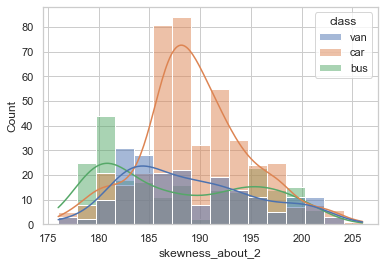

In [113]:
column_name = "skewness_about_2"
sns.histplot(data=data,hue="class",x=column_name,kde=True)
data_imp[data_imp[column_name].isnull()]


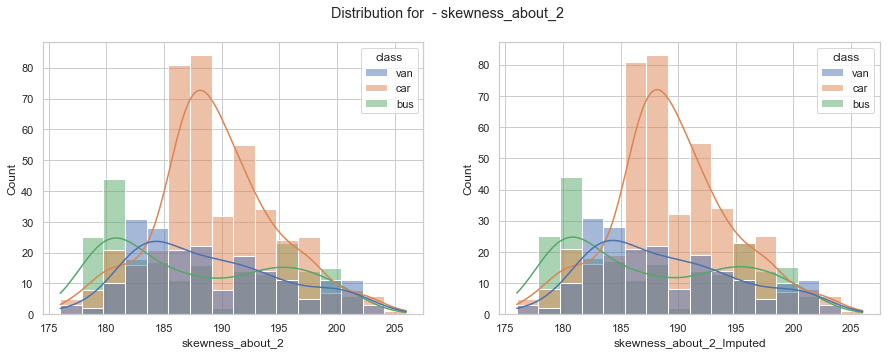

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
419,93,34.0,72.0,144.0,56.0,6,133.0,50.0,18.0,123,158.0,263.0,125.0,63.0,5.0,20.0,189.0,206,car


In [114]:
# Replaced by Median Value 
missing_value = data_imp[column_name].isnull()
median_impute(data_imp,column_name,missing_value)
dist_compare(data,data_imp,column_name,"class")

data_imp.loc[missing_value]

In [115]:
data_imp.isnull().any().sum()

0

###### % of Observation dropped

In [116]:
print("% of Observation removed - ",round(((data.shape[0] - data_imp.shape[0]) / data.shape[0])*100,2))

% of Observation removed -  0.71


Observation - less than 1 % of data is removed and it's ok.

##### Treating Outlier

In [117]:
def plot_distribution(data,column_name,hue_column):
    fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5))
    #sns.histplot(data=data,x=column_name,kde=True,ax=ax[0],bins=10)
    sns.distplot(data[column_name],ax=ax[0],bins=10)
    sns.histplot(data=data,x=column_name,hue=hue_column,kde=True,ax=ax[1])
    #sm.qqplot(data[column_name],ax=ax[2],line='45',fit=True)
    #ax[2].set_xlabel(column_name)
    sns.boxplot(data=data,y=column_name,orient='v',ax=ax[2])
    fig.suptitle("{} - {}".format("Distribution for ",column_name))
    plt.show() 

###### Distribution and BOX plot to find outliers

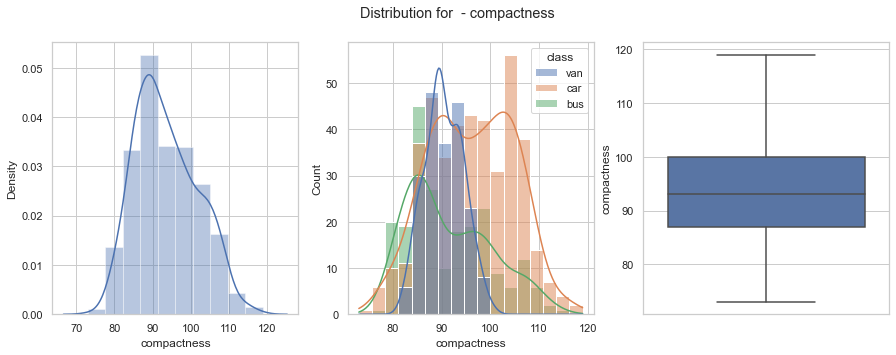

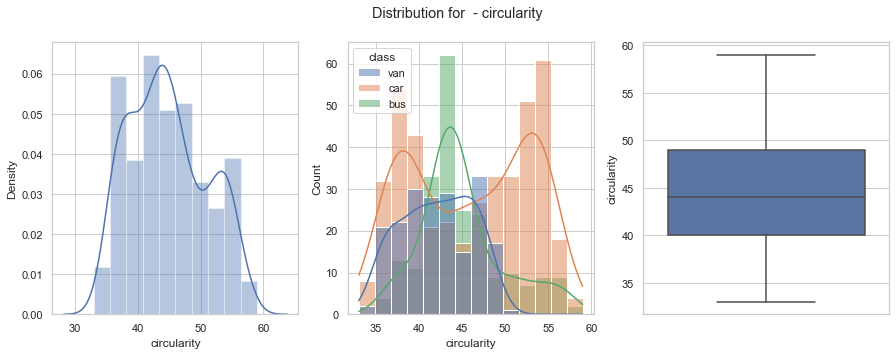

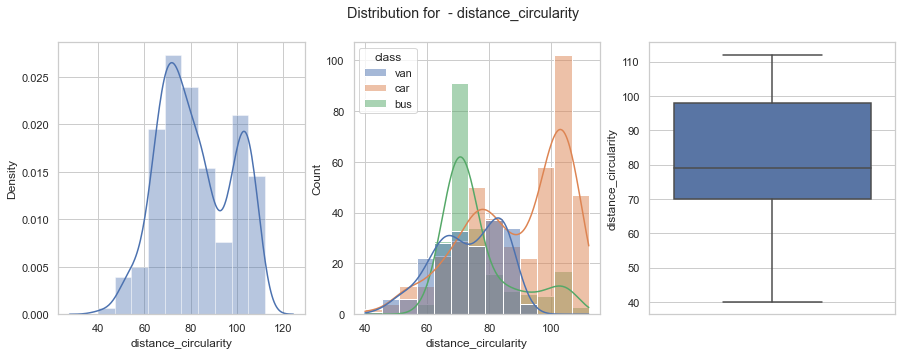

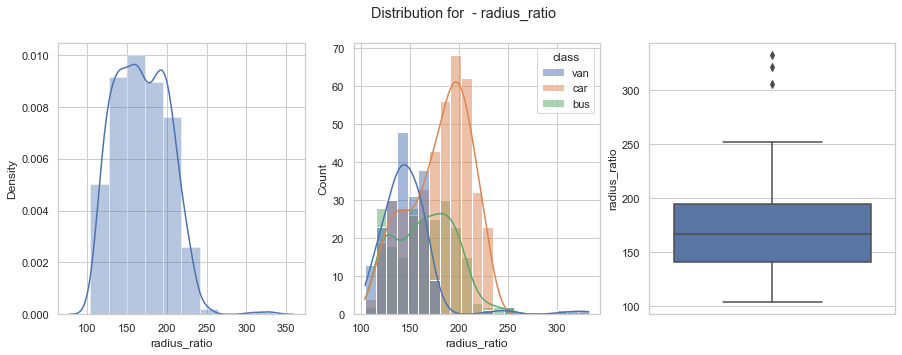

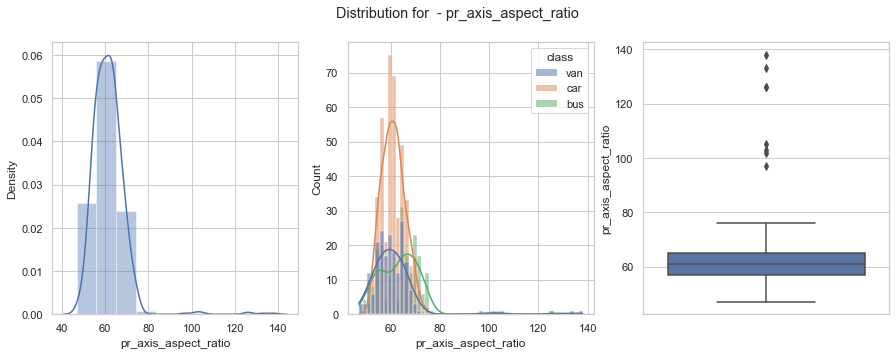

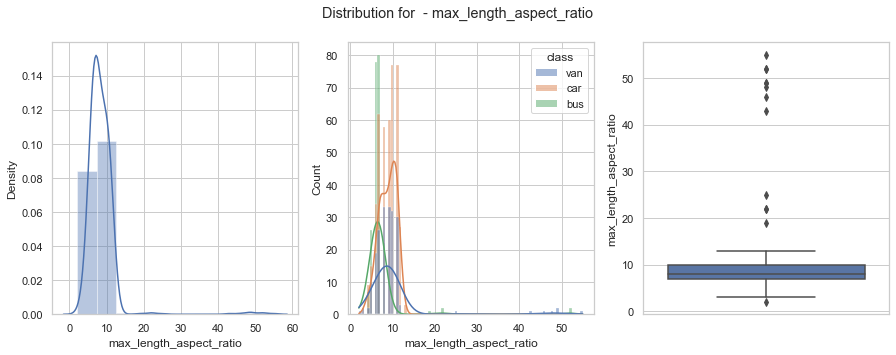

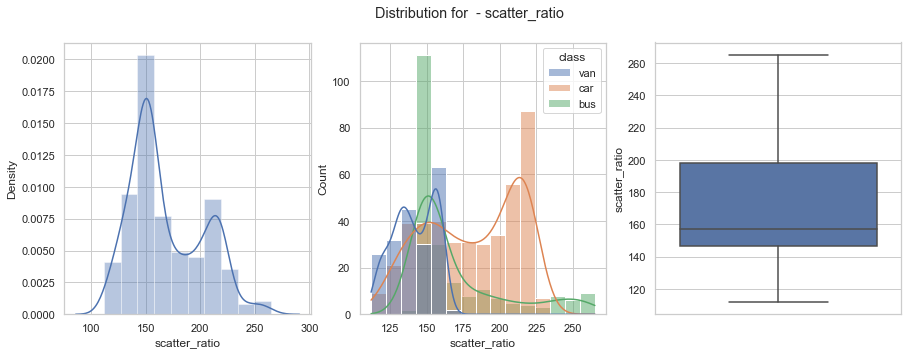

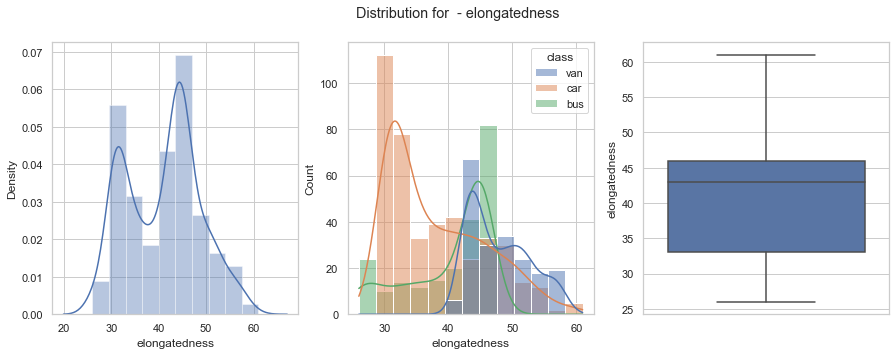

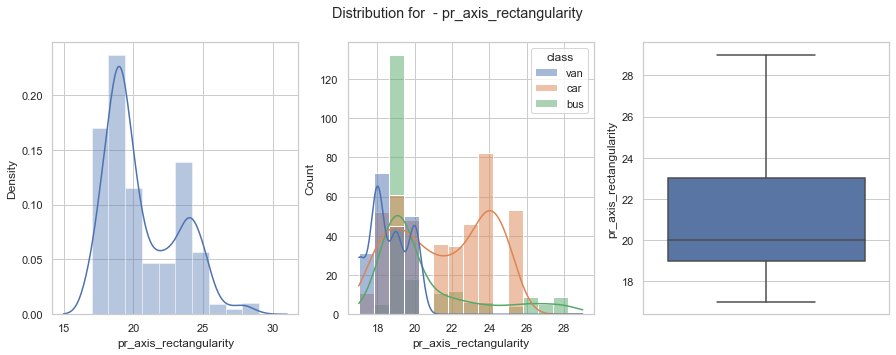

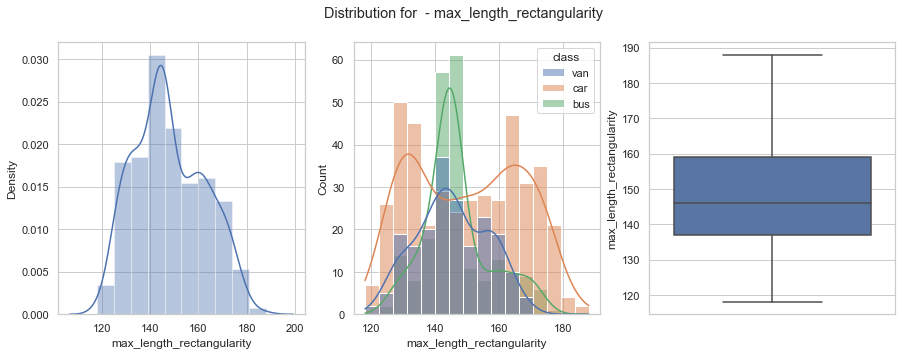

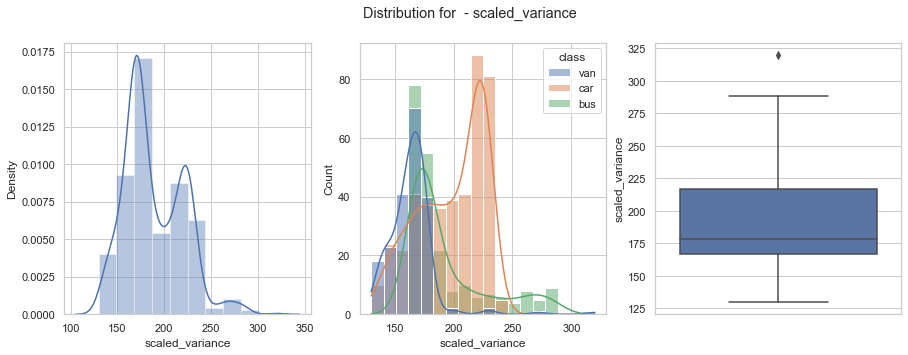

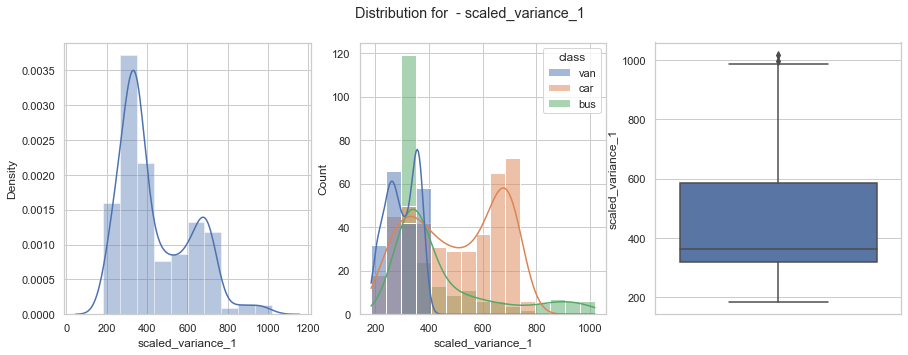

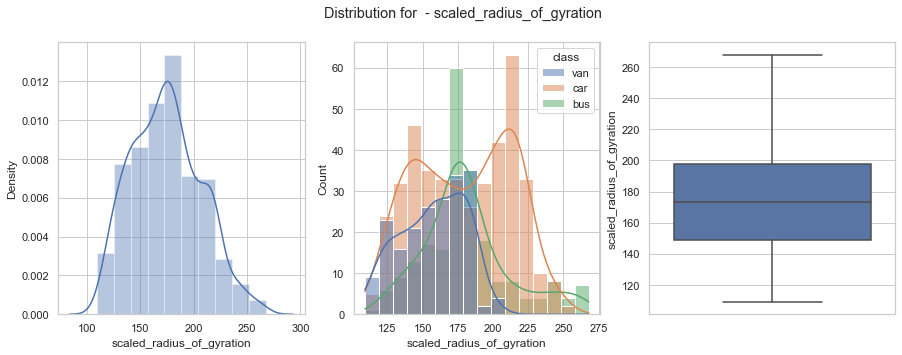

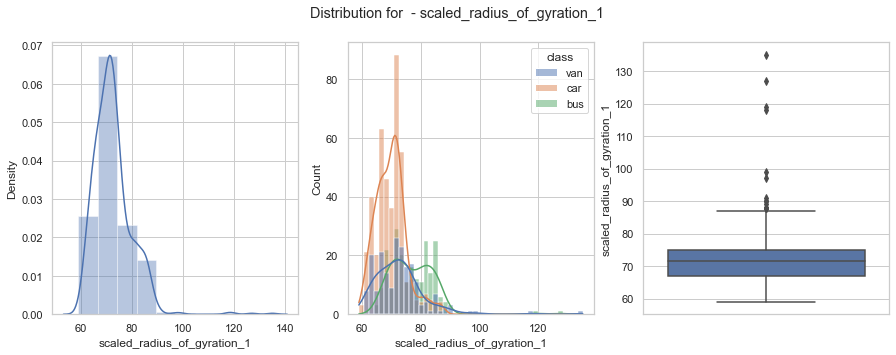

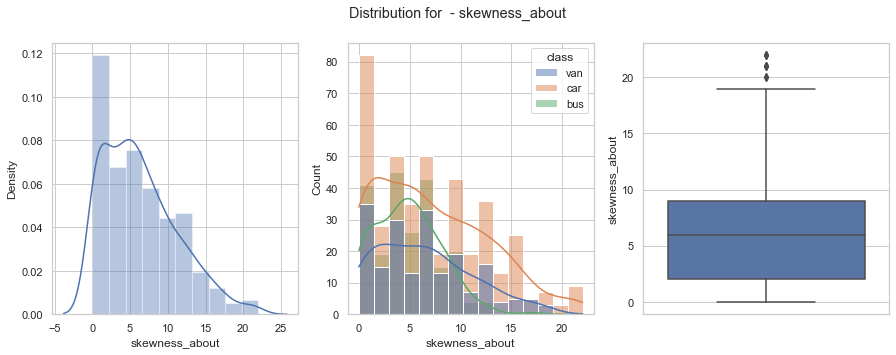

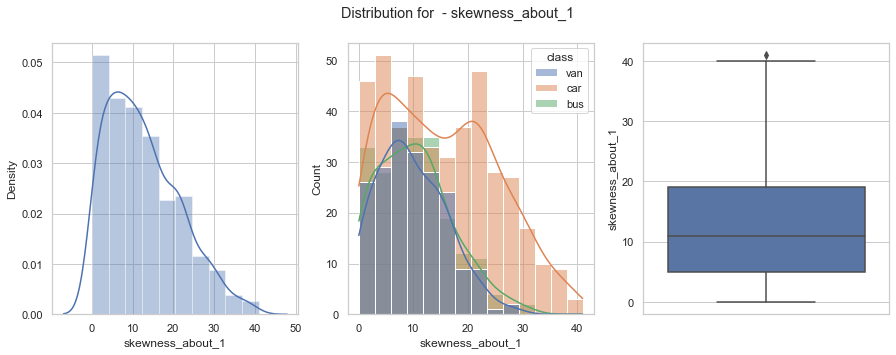

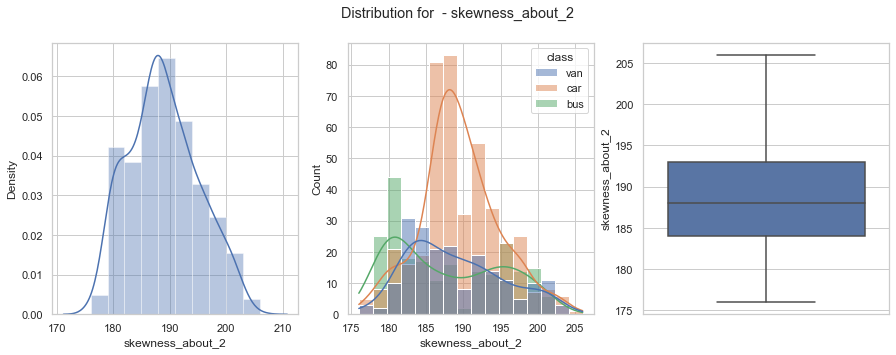

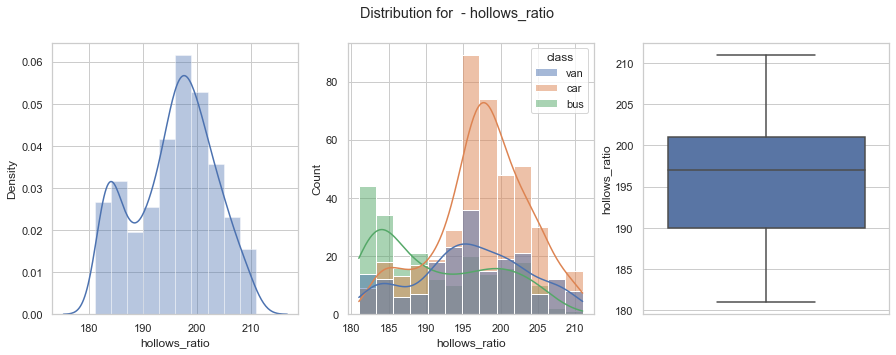

In [118]:
columns_list = list(data_imp.columns)
columns_list.remove("class")
for columnName in columns_list:
  plot_distribution(data_imp,columnName,"class")

Observation :
 

*   Following Variables has the outliers
      - radius_radio
      - pr_axis_aspect_ratio
      - max_length_aspect_ratio
      - scaled_variance
      - scaled_variance_1
      - scaled_radius_of_gyration_1
      - skewness_about
      - skewness_about_1
*   Regaring distribution
      - Arround 6 variable, has bimodel distribution - since "Saab 9000 cars" and an "Opel Manta 400 cars"  merged in single lable "Car"
      - Most of the Variable are Right-Skewed 




In [119]:
# Check how many observation are outliers

describe_df = data_imp.describe().T
describe_df["IQR"] = describe_df["75%"] - describe_df["25%"]
describe_df["UPPER_LIMIT"] = describe_df["75%"] + ( describe_df["IQR"] * 1.5)
describe_df["LOWER_LIMIT"] = describe_df["25%"] - ( describe_df["IQR"] * 1.5)
describe_df

,count,mean,std,min,25%,50%,75%,max,IQR,UPPER_LIMIT,LOWER_LIMIT
compactness,840.0,93.633333,8.214719,73.0,87.00,93.00,100.00,119.0,13.00,119.500,67.500
circularity,840.0,44.805952,6.120889,33.0,40.00,44.00,49.00,59.0,9.00,62.500,26.500
distance_circularity,840.0,82.019048,15.730435,40.0,70.00,79.00,98.00,112.0,28.00,140.000,28.000
radius_ratio,840.0,168.845238,33.426050,104.0,141.00,167.25,195.00,333.0,54.00,276.000,60.000
pr_axis_aspect_ratio,840.0,61.685714,7.901134,47.0,57.00,61.00,65.00,138.0,8.00,77.000,45.000
max_length_aspect_ratio,840.0,8.561905,4.615203,2.0,7.00,8.00,10.00,55.0,3.00,14.500,2.500
scatter_ratio,840.0,168.730952,33.171264,112.0,146.75,157.00,198.00,265.0,51.25,274.875,69.875
elongatedness,840.0,40.946429,7.789283,26.0,33.00,43.00,46.00,61.0,13.00,65.500,13.500
pr_axis_rectangularity,840.0,20.573810,2.587543,17.0,19.00,20.00,23.00,29.0,4.00,29.000,13.000
max_length_rectangularity,840.0,147.933333,14.464220,118.0,137.00,146.00,159.00,188.0,22.00,192.000,104.000


In [120]:
#describe_df.loc[["radius_ratio"]]["UPPER_LIMIT"]
for column_name in describe_df.index:
  print("============",column_name,"==========")
  print("UpperLimit - " , data_imp.loc[ (data_imp[column_name] > float(describe_df.loc[[column_name]]["UPPER_LIMIT"])) ].shape[0])
  print("Lower Limit - " , data_imp.loc[ (data_imp[column_name] < float(describe_df.loc[[column_name]]["LOWER_LIMIT"])) ].shape[0])



============ compactness ==========
UpperLimit -  0
Lower Limit -  0
============ circularity ==========
UpperLimit -  0
Lower Limit -  0
============ distance_circularity ==========
UpperLimit -  0
Lower Limit -  0
============ radius_ratio ==========
UpperLimit -  3
Lower Limit -  0
============ pr_axis_aspect_ratio ==========
UpperLimit -  8
Lower Limit -  0
============ max_length_aspect_ratio ==========
UpperLimit -  12
Lower Limit -  1
============ scatter_ratio ==========
UpperLimit -  0
Lower Limit -  0
============ elongatedness ==========
UpperLimit -  0
Lower Limit -  0
============ pr_axis_rectangularity ==========
UpperLimit -  0
Lower Limit -  0
============ max_length_rectangularity ==========
UpperLimit -  0
Lower Limit -  0
============ scaled_variance ==========
UpperLimit -  1
Lower Limit -  0
============ scaled_variance_1 ==========
UpperLimit -  2
Lower Limit -  0
============ scaled_radius_of_gyration ==========
UpperLimit -  0
Lower Limit -  0
============ scale

###### Trearing Outlier using capping technique

In [121]:
def dist_compare_outlier(data,column_name,column_name1,hue_column):
    fig,ax = plt.subplots(nrows=1,ncols=3,figsize=(15,5))

    sns.histplot(data=data,x=column_name,hue=hue_column,kde=True,ax=ax[0])
    sns.histplot(data=data,x=column_name1,hue=hue_column,kde=True,ax=ax[1])   
    sns.boxplot(data=data,y=column_name1,orient='v',ax=ax[2])
    fig.suptitle("{} - {}".format("Distribution for ",column_name))
    plt.show() 

------ radius_ratio --------------------
Upper limit -  276.0
lower limit -  60.0


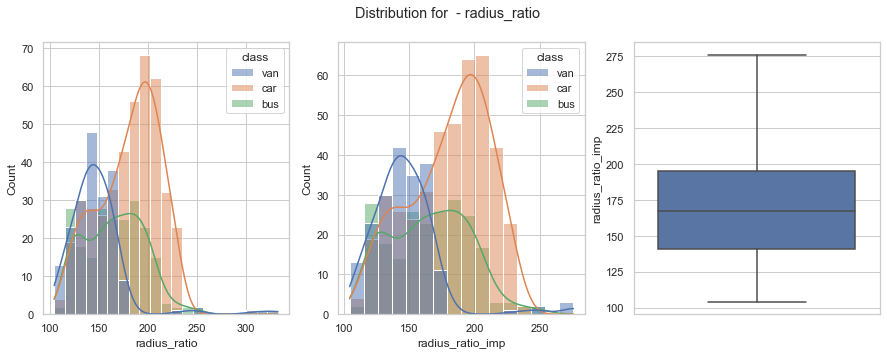

     radius_ratio  radius_ratio_imp
37          306.0             276.0
135         322.0             276.0
388         333.0             276.0
--------------------------
------ pr_axis_aspect_ratio --------------------
Upper limit -  77.0
lower limit -  45.0


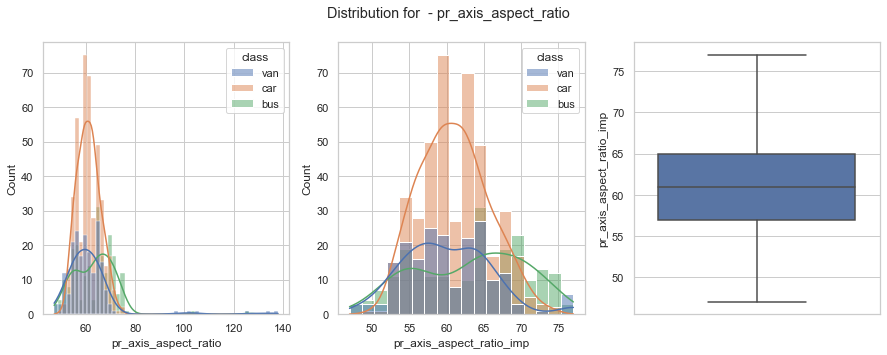

     pr_axis_aspect_ratio  pr_axis_aspect_ratio_imp
4                   103.0                      77.0
37                  126.0                      77.0
100                 126.0                      77.0
135                 133.0                      77.0
291                 102.0                      77.0
388                 138.0                      77.0
523                  97.0                      77.0
706                 105.0                      77.0
--------------------------
------ max_length_aspect_ratio --------------------
Upper limit -  14.5
lower limit -  2.5


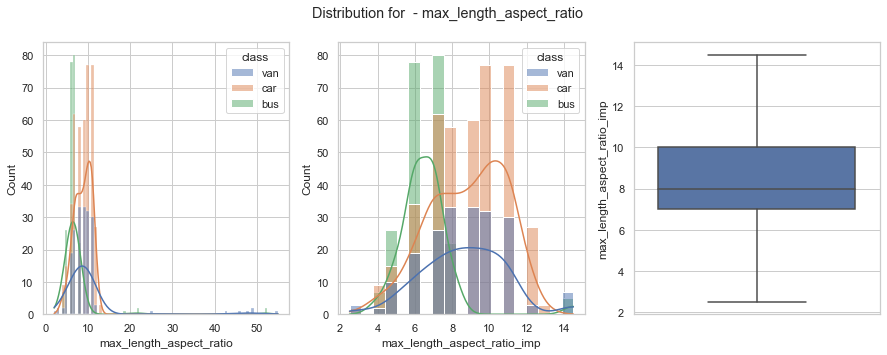

     max_length_aspect_ratio  max_length_aspect_ratio_imp
4                         52                         14.5
37                        49                         14.5
100                       52                         14.5
127                       22                         14.5
135                       48                         14.5
291                       43                         14.5
388                       49                         14.5
391                       25                         14.5
523                       46                         14.5
544                       19                         14.5
655                        2                          2.5
706                       55                         14.5
815                       22                         14.5
--------------------------
------ scaled_variance --------------------
Upper limit -  292.0
lower limit -  92.0


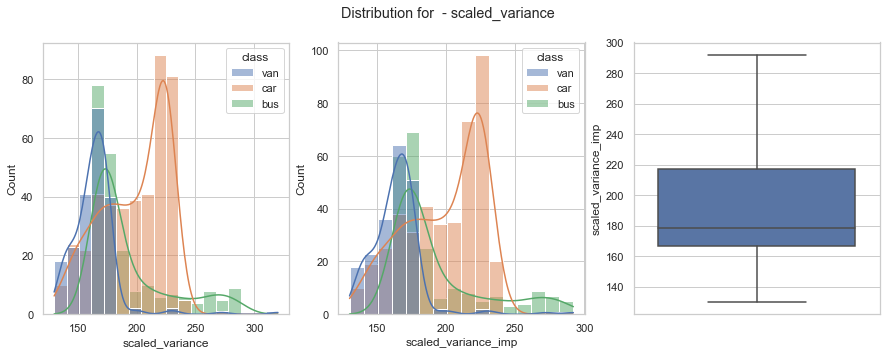

     scaled_variance  scaled_variance_imp
388            320.0                292.0
--------------------------
------ scaled_variance_1 --------------------
Upper limit -  987.5
lower limit -  -82.5


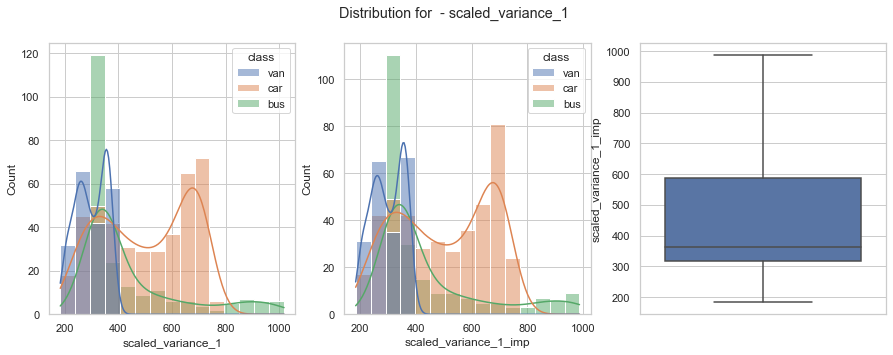

     scaled_variance_1  scaled_variance_1_imp
85               998.0                  987.5
835             1018.0                  987.5
--------------------------
------ scaled_radius_of_gyration_1 --------------------
Upper limit -  87.0
lower limit -  55.0


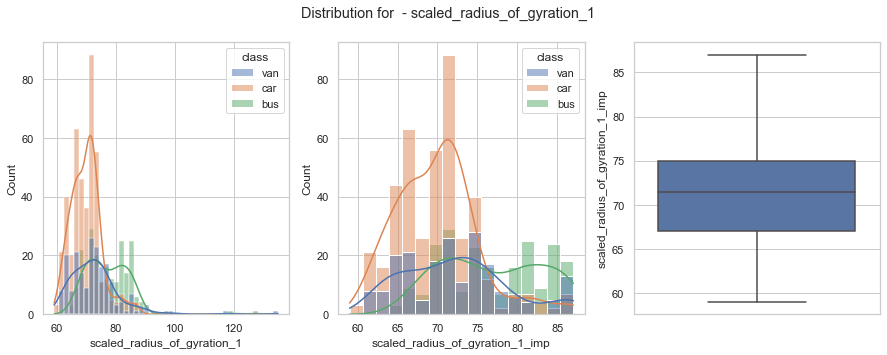

     scaled_radius_of_gyration_1  scaled_radius_of_gyration_1_imp
4                          127.0                             87.0
37                         118.0                             87.0
47                          88.0                             87.0
79                          88.0                             87.0
100                        119.0                             87.0
135                         97.0                             87.0
230                         89.0                             87.0
291                         90.0                             87.0
381                         88.0                             87.0
388                        135.0                             87.0
498                         88.0                             87.0
523                         91.0                             87.0
655                         90.0                             87.0
706                         99.0                             87.0
815       

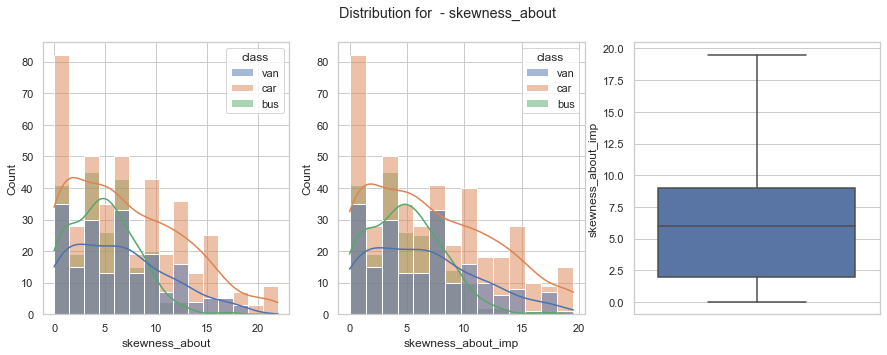

     skewness_about  skewness_about_imp
44             20.0                19.5
113            21.0                19.5
123            22.0                19.5
190            20.0                19.5
346            21.0                19.5
400            21.0                19.5
505            21.0                19.5
516            22.0                19.5
623            22.0                19.5
761            22.0                19.5
796            20.0                19.5
797            21.0                19.5
--------------------------
------ skewness_about_1 --------------------
Upper limit -  40.0
lower limit -  -16.0


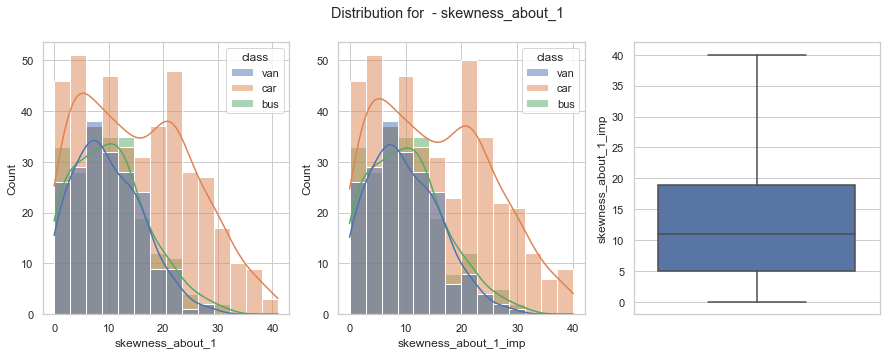

     skewness_about_1  skewness_about_1_imp
132              41.0                  40.0
--------------------------


In [122]:
column_name_withoutlier = ["radius_ratio","pr_axis_aspect_ratio","max_length_aspect_ratio","scaled_variance","scaled_variance_1","scaled_radius_of_gyration_1","skewness_about","skewness_about_1"]

for column_name in column_name_withoutlier:
  print("------",column_name,"--------------------")
  imp_column_name = column_name+"_imp"
  outlier = data_imp[(data_imp[column_name] > float(describe_df.loc[[column_name]]["UPPER_LIMIT"])) | (data_imp[column_name] < float(describe_df.loc[[column_name]]["LOWER_LIMIT"]))]
  upperLimit = float(describe_df.loc[[column_name]]["UPPER_LIMIT"])
  lowerLimit = float(describe_df.loc[[column_name]]["LOWER_LIMIT"])
  print("Upper limit - " , upperLimit)
  print("lower limit - " , lowerLimit)
  data_imp[imp_column_name] = np.where((data_imp[column_name] > upperLimit),upperLimit,
                                      np.where(data_imp[column_name] < lowerLimit,lowerLimit,data_imp[column_name]))
  dist_compare_outlier(data_imp,column_name,imp_column_name,"class")
  print(data_imp.loc[outlier.index][[column_name,imp_column_name]])
  print("--------------------------")


##### Target class - update numeric value

In [123]:
data_imp["class"].replace({'car':0,'bus':1,'van':2},inplace=True)
data_imp.head()

,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class,radius_ratio_imp,pr_axis_aspect_ratio_imp,max_length_aspect_ratio_imp,scaled_variance_imp,scaled_variance_1_imp,scaled_radius_of_gyration_1_imp,skewness_about_imp,skewness_about_1_imp
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2,178.0,72.0,10.0,176.0,379.0,70.0,6.0,16.0
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2,141.0,57.0,9.0,170.0,330.0,72.0,9.0,14.0
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,0,209.0,66.0,10.0,223.0,635.0,73.0,14.0,9.0
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2,159.0,63.0,9.0,160.0,309.0,63.0,6.0,10.0
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,1,205.0,77.0,14.5,241.0,325.0,87.0,9.0,11.0


In [124]:
data_imp["class"].value_counts()

0    424
1    218
2    198
Name: class, dtype: int64

##### Check for multicollinearity

In [125]:
corr_matrix = data_imp[['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr_axis_aspect_ratio', 'max_length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr_axis_rectangularity', 'max_length_rectangularity',
       'scaled_variance', 'scaled_variance_1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration_1', 'skewness_about', 'skewness_about_1',
       'skewness_about_2', 'hollows_ratio','class']].corr()

def mark_highcorrelation(value):
  if value <=0.9:
    color = "red"
  else:
    color = "black"  
  return 'color: %s' % color

corr_matrix = round(corr_matrix,2)

corr_matrix.style.applymap(lambda x: 'background-color : red' if abs(x)>=0.9 else '')



,compactness,circularity,distance_circularity,radius_ratio,pr_axis_aspect_ratio,max_length_aspect_ratio,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration,scaled_radius_of_gyration_1,skewness_about,skewness_about_1,skewness_about_2,hollows_ratio,class
compactness,1.000000,0.690000,0.790000,0.690000,0.090000,0.150000,0.810000,-0.790000,0.810000,0.670000,0.760000,0.820000,0.580000,-0.250000,0.240000,0.160000,0.300000,0.360000,-0.300000
circularity,0.690000,1.000000,0.790000,0.620000,0.160000,0.250000,0.850000,-0.820000,0.850000,0.960000,0.790000,0.840000,0.930000,0.050000,0.150000,-0.010000,-0.110000,0.040000,-0.250000
distance_circularity,0.790000,0.790000,1.000000,0.770000,0.160000,0.260000,0.910000,-0.910000,0.890000,0.770000,0.860000,0.890000,0.700000,-0.230000,0.110000,0.270000,0.150000,0.330000,-0.430000
radius_ratio,0.690000,0.620000,0.770000,1.000000,0.660000,0.450000,0.740000,-0.790000,0.710000,0.570000,0.790000,0.720000,0.530000,-0.180000,0.050000,0.170000,0.380000,0.470000,-0.410000
pr_axis_aspect_ratio,0.090000,0.160000,0.160000,0.660000,1.000000,0.650000,0.100000,-0.180000,0.080000,0.130000,0.270000,0.090000,0.120000,0.150000,-0.060000,-0.040000,0.240000,0.270000,0.040000
max_length_aspect_ratio,0.150000,0.250000,0.260000,0.450000,0.650000,1.000000,0.160000,-0.180000,0.160000,0.300000,0.320000,0.140000,0.190000,0.300000,0.020000,0.040000,-0.030000,0.140000,0.040000
scatter_ratio,0.810000,0.850000,0.910000,0.740000,0.100000,0.160000,1.000000,-0.970000,0.990000,0.810000,0.950000,1.000000,0.800000,-0.030000,0.070000,0.210000,0.010000,0.120000,-0.460000
elongatedness,-0.790000,-0.820000,-0.910000,-0.790000,-0.180000,-0.180000,-0.970000,1.000000,-0.950000,-0.770000,-0.940000,-0.960000,-0.760000,0.100000,-0.050000,-0.190000,-0.110000,-0.210000,0.480000
pr_axis_rectangularity,0.810000,0.850000,0.890000,0.710000,0.080000,0.160000,0.990000,-0.950000,1.000000,0.810000,0.940000,0.990000,0.800000,-0.020000,0.080000,0.220000,-0.020000,0.100000,-0.450000
max_length_rectangularity,0.670000,0.960000,0.770000,0.570000,0.130000,0.300000,0.810000,-0.770000,0.810000,1.000000,0.740000,0.800000,0.870000,0.040000,0.140000,0.000000,-0.110000,0.070000,-0.140000


Observation and Conclusion:
- Following varaiables have high correlation ( |correlation| >=0.9)
  - circularity,distance_circularity,scatter_ratio,elongatedness,pr_axis_rectangularity,max_length_rectangularity,scaled_variance,scaled_variance_1,scaled_radius_of_gyration
- Variables need to be dropped is selected using VIF  (variance inflation factor) 


###### VIF (variance inflation factor) - drop hig correlation variables

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

def calc_vif(X):

    # Calculating VIF
    X = add_constant(X)
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif.drop(vif[vif["variables"] =="const"].index,inplace=True)
    return(vif)

cols_with_high_correlation = ['circularity', 'distance_circularity','scatter_ratio','elongatedness','pr_axis_rectangularity','max_length_rectangularity','scaled_variance', 'scaled_variance_1','scaled_radius_of_gyration']    

X = data_imp[cols_with_high_correlation]   
vif_df = calc_vif(X)
vif_df.sort_values(by="VIF",ascending=False)


,variables,VIF
3,scatter_ratio,629.748905
8,scaled_variance_1,322.586032
5,pr_axis_rectangularity,90.211377
4,elongatedness,47.716619
1,circularity,30.618784
6,max_length_rectangularity,16.840602
7,scaled_variance,12.216944
9,scaled_radius_of_gyration,8.620499
2,distance_circularity,7.043629


Observation and Conclusion:
- Considering the VIF <=10 , scaled_radius_of_gyration,distance_circularity selected for the model building.Remaining columns can be dropped

#### Model Building

In [127]:
def check_distribution(traindata,testdata,columns_list):
    for column_name in columns_list:
        print("---------------",column_name,"------------")
        print(round(traindata[column_name].value_counts() / traindata[column_name].count(),2)*100)
        print(round(testdata[column_name].value_counts() / testdata[column_name].count(),2)*100)

###### Model 1
- Train/Test ( 70:30) + with original varaibles ( outliers not treated)

In [128]:
m1_metrics_data = pd.DataFrame(columns=["C","gamma"])

id_variable = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr_axis_aspect_ratio', 'max_length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr_axis_rectangularity', 'max_length_rectangularity',
       'scaled_variance', 'scaled_variance_1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration_1', 'skewness_about', 'skewness_about_1',
       'skewness_about_2', 'hollows_ratio']
dp_varaible = ["class"]

X = data_imp[id_variable]
y = data_imp[dp_varaible]
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

check_distribution(y_train, y_test,["class"])

for C in [1, 10, 100]:    
    for gamma in [0.1,0.01,0.001, 0.0001]:
      #print("C = ",C,"::","gamma = ",gamma )
      model = SVC(C=C,gamma =gamma,random_state=101)
      model.fit(X_train,y_train) 
      #print("Train Score", model.score(X_train,y_train))
      #print("Test Score",model.score(X_test,y_test))
      metrics_dic = dict()
      metrics_dic = {"C":C,"gamma":gamma,
                     "M1_TRAIN_SCORE":model.score(X_train,y_train),
                     "M1_TEST_SCORE":model.score(X_test,y_test)}
      #print(metrics_dic)
      m1_metrics_data = m1_metrics_data.append(metrics_dic,ignore_index=True) 
      #m1_metrics_data.set_index(["C","gamma"],inplace=True)


m1_metrics_data


--------------- class ------------
0    52.0
1    24.0
2    24.0
Name: class, dtype: float64
0    48.0
1    30.0
2    22.0
Name: class, dtype: float64


,C,gamma,M1_TEST_SCORE,M1_TRAIN_SCORE
0,1.0,0.1000,0.944444,0.984694
1,1.0,0.0100,0.920635,0.947279
2,1.0,0.0010,0.488095,0.520408
3,1.0,0.0001,0.480159,0.515306
4,10.0,0.1000,0.960317,1.000000
5,10.0,0.0100,0.964286,0.982993
6,10.0,0.0010,0.896825,0.935374
7,10.0,0.0001,0.488095,0.520408
8,100.0,0.1000,0.948413,1.000000
9,100.0,0.0100,0.968254,0.996599


###### Model 2
- Train/Test ( 70:30) + varaibles with outliers treated

In [129]:
m2_metrics_data = pd.DataFrame(columns=["C","gamma"])

id_variable = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio_imp',
       'pr_axis_aspect_ratio_imp', 'max_length_aspect_ratio_imp', 'scatter_ratio',
       'elongatedness', 'pr_axis_rectangularity', 'max_length_rectangularity',
       'scaled_variance_imp', 'scaled_variance_1_imp', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration_1_imp', 'skewness_about_imp', 'skewness_about_1_imp',
       'skewness_about_2', 'hollows_ratio']
dp_varaible = ["class"]

X = data_imp[id_variable]
y = data_imp[dp_varaible]
X = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

check_distribution(y_train, y_test,["class"])

for C in [1, 10, 100]:    
    for gamma in [0.1,0.01,0.001, 0.0001]:
      #print("C = ",C,"::","gamma = ",gamma )
      model = SVC(C=C,gamma =gamma,random_state=101)
      model.fit(X_train,y_train) 
      #print("Train Score", model.score(X_train,y_train))
      #print("Test Score",model.score(X_test,y_test))
      metrics_dic = dict()
      metrics_dic = {"C":C,"gamma":gamma,
                     "M2_TRAIN_SCORE":model.score(X_train,y_train),
                     "M2_TEST_SCORE":model.score(X_test,y_test)}
      #print(metrics_dic)
      m2_metrics_data = m2_metrics_data.append(metrics_dic,ignore_index=True) 


m2_metrics_data


--------------- class ------------
0    52.0
1    24.0
2    24.0
Name: class, dtype: float64
0    48.0
1    30.0
2    22.0
Name: class, dtype: float64


,C,gamma,M2_TEST_SCORE,M2_TRAIN_SCORE
0,1.0,0.1000,0.940476,0.988095
1,1.0,0.0100,0.936508,0.954082
2,1.0,0.0010,0.484127,0.522109
3,1.0,0.0001,0.480159,0.515306
4,10.0,0.1000,0.956349,1.000000
5,10.0,0.0100,0.968254,0.986395
6,10.0,0.0010,0.904762,0.937075
7,10.0,0.0001,0.484127,0.522109
8,100.0,0.1000,0.960317,1.000000
9,100.0,0.0100,0.976190,0.996599


###### Model 3
- StratifiedKFold ( split = 5 )  + with original varaibles ( outliers not treated)

In [130]:
m3_metrics_data = pd.DataFrame(columns=["C","gamma"])

id_variable = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr_axis_aspect_ratio', 'max_length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr_axis_rectangularity', 'max_length_rectangularity',
       'scaled_variance', 'scaled_variance_1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration_1', 'skewness_about', 'skewness_about_1',
       'skewness_about_2', 'hollows_ratio']
dp_varaible = ["class"]

X = data_imp[id_variable]
y = data_imp[dp_varaible]
X = StandardScaler().fit_transform(X)
sfk = StratifiedKFold(n_splits=5,random_state=123)

for C in [1, 10, 100]:    
    for gamma in [0.1,0.01,0.001, 0.0001]: 
      print("C = ",C,"::","gamma = ",gamma )
      train_accuracy = []
      test_accuracy = []
      for train_index,test_index in sfk.split(X,y):
        X_train,X_test = X[train_index],X[test_index]
        y_train,y_test = y.iloc[train_index],y.iloc[test_index]
        model = SVC(C=C,gamma =gamma,random_state=101)
        model.fit(X_train,y_train)
        #y_predicted = model.predict(X[test_index])
        train_accuracy.append(model.score(X_train,y_train))
        test_accuracy.append(model.score(X_test,y_test))
      metrics_dic = dict()
      metrics_dic = {"C":C,
                         "gamma":gamma,
                         "M3_TRAIN_MEAN_SCORE":np.mean(train_accuracy),
                         "M3_TRAIN_STD_SCORE":np.std(train_accuracy),
                         "M3_TEST_MEAN_SCORE":np.mean(test_accuracy),
                         "M3_TEST_STD_SCORE":np.std(test_accuracy)}
      m3_metrics_data = m3_metrics_data.append(metrics_dic,ignore_index=True)                      
      print(train_accuracy)                    
      print(test_accuracy) 

m3_metrics_data

C =  1 :: gamma =  0.1
[0.9806547619047619, 0.9851190476190477, 0.9836309523809523, 0.9776785714285714, 0.9821428571428571]
[0.9523809523809523, 0.9583333333333334, 0.9761904761904762, 0.9821428571428571, 0.9583333333333334]
C =  1 :: gamma =  0.01
[0.9464285714285714, 0.9404761904761905, 0.9434523809523809, 0.9434523809523809, 0.9345238095238095]
[0.9285714285714286, 0.9404761904761905, 0.9404761904761905, 0.9285714285714286, 0.9464285714285714]
C =  1 :: gamma =  0.001
[0.6160714285714286, 0.5476190476190477, 0.5505952380952381, 0.53125, 0.5104166666666666]
[0.5714285714285714, 0.5535714285714286, 0.5238095238095238, 0.5416666666666666, 0.5119047619047619]
C =  1 :: gamma =  0.0001
[0.5044642857142857, 0.5044642857142857, 0.5059523809523809, 0.5044642857142857, 0.5044642857142857]
[0.5059523809523809, 0.5059523809523809, 0.5, 0.5059523809523809, 0.5059523809523809]
C =  10 :: gamma =  0.1
[1.0, 1.0, 0.9985119047619048, 0.9985119047619048, 0.9985119047619048]
[0.9642857142857143, 0.97

,C,gamma,M3_TEST_MEAN_SCORE,M3_TEST_STD_SCORE,M3_TRAIN_MEAN_SCORE,M3_TRAIN_STD_SCORE
0,1.0,0.1000,0.965476,0.011542,0.981845,0.002560
1,1.0,0.0100,0.936905,0.007143,0.941667,0.004037
2,1.0,0.0010,0.540476,0.021095,0.551190,0.035448
3,1.0,0.0001,0.504762,0.002381,0.504762,0.000595
4,10.0,0.1000,0.977381,0.006942,0.999107,0.000729
5,10.0,0.0100,0.973810,0.002916,0.978274,0.001190
6,10.0,0.0010,0.913095,0.018672,0.923810,0.001735
7,10.0,0.0001,0.542857,0.021095,0.551786,0.035483
8,100.0,0.1000,0.979762,0.010378,1.000000,0.000000
9,100.0,0.0100,0.982143,0.006521,0.994345,0.001458


###### Model 4
- StratifiedKFold ( split = 5 )  + varaibles with outliers treated

In [131]:
m4_metrics_data = pd.DataFrame(columns=["C","gamma"])

id_variable = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio_imp',
       'pr_axis_aspect_ratio_imp', 'max_length_aspect_ratio_imp', 'scatter_ratio',
       'elongatedness', 'pr_axis_rectangularity', 'max_length_rectangularity',
       'scaled_variance_imp', 'scaled_variance_1_imp', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration_1_imp', 'skewness_about_imp', 'skewness_about_1_imp',
       'skewness_about_2', 'hollows_ratio']
dp_varaible = ["class"]


X = data_imp[id_variable]
y = data_imp[dp_varaible]
X = StandardScaler().fit_transform(X)
sfk = StratifiedKFold(n_splits=5,random_state=123)

for C in [1, 10, 100]:    
    for gamma in [0.1,0.01,0.001, 0.0001]: 
      print("C = ",C,"::","gamma = ",gamma )
      train_accuracy = []
      test_accuracy = []
      for train_index,test_index in sfk.split(X,y):
        X_train,X_test = X[train_index],X[test_index]
        y_train,y_test = y.iloc[train_index],y.iloc[test_index]
        model = SVC(C=C,gamma =gamma,random_state=101)
        model.fit(X_train,y_train)
        #y_predicted = model.predict(X[test_index])
        train_accuracy.append(model.score(X_train,y_train))
        test_accuracy.append(model.score(X_test,y_test))
      metrics_dic = dict()
      metrics_dic = {"C":C,
                         "gamma":gamma,
                         "M4_TRAIN_MEAN_SCORE":np.mean(train_accuracy),
                         "M4_TRAIN_STD_SCORE":np.std(train_accuracy),
                         "M4_TEST_MEAN_SCORE":np.mean(test_accuracy),
                         "M4_TEST_STD_SCORE":np.std(test_accuracy)}
      m4_metrics_data = m4_metrics_data.append(metrics_dic,ignore_index=True)                      
      print(train_accuracy)                    
      print(test_accuracy) 

m4_metrics_data

C =  1 :: gamma =  0.1
[0.9836309523809523, 0.9880952380952381, 0.9880952380952381, 0.9836309523809523, 0.9880952380952381]
[0.9464285714285714, 0.9761904761904762, 0.9940476190476191, 0.9702380952380952, 0.9583333333333334]
C =  1 :: gamma =  0.01
[0.9523809523809523, 0.9508928571428571, 0.9523809523809523, 0.9568452380952381, 0.9494047619047619]
[0.9404761904761905, 0.9464285714285714, 0.9583333333333334, 0.9226190476190477, 0.9523809523809523]
C =  1 :: gamma =  0.001
[0.6934523809523809, 0.5997023809523809, 0.5967261904761905, 0.5758928571428571, 0.5580357142857143]
[0.6607142857142857, 0.5833333333333334, 0.5773809523809523, 0.5952380952380952, 0.5357142857142857]
C =  1 :: gamma =  0.0001
[0.5044642857142857, 0.5044642857142857, 0.5059523809523809, 0.5044642857142857, 0.5044642857142857]
[0.5059523809523809, 0.5059523809523809, 0.5, 0.5059523809523809, 0.5059523809523809]
C =  10 :: gamma =  0.1
[1.0, 1.0, 1.0, 0.9985119047619048, 1.0]
[0.9761904761904762, 0.9821428571428571, 0.9

,C,gamma,M4_TEST_MEAN_SCORE,M4_TEST_STD_SCORE,M4_TRAIN_MEAN_SCORE,M4_TRAIN_STD_SCORE
0,1.0,0.1000,0.969048,0.016148,0.986310,0.002187
1,1.0,0.0100,0.944048,0.012257,0.952381,0.002490
2,1.0,0.0010,0.590476,0.040441,0.604762,0.046846
3,1.0,0.0001,0.504762,0.002381,0.504762,0.000595
4,10.0,0.1000,0.982143,0.008418,0.999702,0.000595
5,10.0,0.0100,0.973810,0.009671,0.982738,0.000729
6,10.0,0.0010,0.914286,0.008074,0.927976,0.002227
7,10.0,0.0001,0.601190,0.043252,0.613690,0.047718
8,100.0,0.1000,0.980952,0.009524,1.000000,0.000000
9,100.0,0.0100,0.984524,0.002916,0.995536,0.000941


###### Model 5
- StratifiedKFold ( split = 5 )  + varaibles with outliers treated + removing the varaibles with VIF greater than 10

In [132]:
m5_metrics_data = pd.DataFrame(columns=["C","gamma"])

id_variable = ['compactness','distance_circularity', 'radius_ratio_imp',
       'pr_axis_aspect_ratio_imp', 'max_length_aspect_ratio_imp', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration_1', 'skewness_about_imp', 'skewness_about_1_imp',
       'skewness_about_2', 'hollows_ratio']
dp_varaible = ["class"]

X = data_imp[id_variable]
y = data_imp[dp_varaible]
X = StandardScaler().fit_transform(X)
sfk = StratifiedKFold(n_splits=5,random_state=123)

for C in [1, 10, 100]:    
    for gamma in [0.1,0.01,0.001, 0.0001]: 
      print("C = ",C,"::","gamma = ",gamma )
      train_accuracy = []
      test_accuracy = []
      for train_index,test_index in sfk.split(X,y):
        X_train,X_test = X[train_index],X[test_index]
        y_train,y_test = y.iloc[train_index],y.iloc[test_index]
        model = SVC(C=C,gamma =gamma,random_state=101)
        model.fit(X_train,y_train)
        #y_predicted = model.predict(X[test_index])
        train_accuracy.append(model.score(X_train,y_train))
        test_accuracy.append(model.score(X_test,y_test))
      metrics_dic = dict()
      metrics_dic = {"C":C,
                         "gamma":gamma,
                         "M5_TRAIN_MEAN_SCORE":np.mean(train_accuracy),
                         "M5_TRAIN_STD_SCORE":np.std(train_accuracy),
                         "M5_TEST_MEAN_SCORE":np.mean(test_accuracy),
                         "M5_TEST_STD_SCORE":np.std(test_accuracy)}
      m5_metrics_data = m5_metrics_data.append(metrics_dic,ignore_index=True)                      
      print(train_accuracy)                    
      print(test_accuracy) 

m5_metrics_data

C =  1 :: gamma =  0.1
[0.9627976190476191, 0.96875, 0.9598214285714286, 0.9717261904761905, 0.96875]
[0.9404761904761905, 0.9345238095238095, 0.9642857142857143, 0.9166666666666666, 0.9404761904761905]
C =  1 :: gamma =  0.01
[0.8943452380952381, 0.8943452380952381, 0.9047619047619048, 0.8988095238095238, 0.9002976190476191]
[0.9047619047619048, 0.8809523809523809, 0.8630952380952381, 0.8809523809523809, 0.875]
C =  1 :: gamma =  0.001
[0.5625, 0.5297619047619048, 0.5238095238095238, 0.5119047619047619, 0.5267857142857143]
[0.5714285714285714, 0.5119047619047619, 0.5119047619047619, 0.5476190476190477, 0.5059523809523809]
C =  1 :: gamma =  0.0001
[0.5044642857142857, 0.5044642857142857, 0.5059523809523809, 0.5044642857142857, 0.5044642857142857]
[0.5059523809523809, 0.5059523809523809, 0.5, 0.5059523809523809, 0.5059523809523809]
C =  10 :: gamma =  0.1
[0.9895833333333334, 0.9880952380952381, 0.9880952380952381, 0.9880952380952381, 0.9940476190476191]
[0.9464285714285714, 0.92261904

,C,gamma,M5_TEST_MEAN_SCORE,M5_TEST_STD_SCORE,M5_TRAIN_MEAN_SCORE,M5_TRAIN_STD_SCORE
0,1.0,0.1000,0.939286,0.015246,0.966369,0.004374
1,1.0,0.0100,0.880952,0.013574,0.898512,0.003926
2,1.0,0.0010,0.529762,0.025533,0.530952,0.016899
3,1.0,0.0001,0.504762,0.002381,0.504762,0.000595
4,10.0,0.1000,0.944048,0.015338,0.989583,0.002305
5,10.0,0.0100,0.939286,0.006942,0.956548,0.003035
6,10.0,0.0010,0.852381,0.013781,0.865774,0.003178
7,10.0,0.0001,0.532143,0.023690,0.531548,0.017415
8,100.0,0.1000,0.940476,0.017252,1.000000,0.000000
9,100.0,0.0100,0.963095,0.009524,0.977083,0.001518


In [133]:
m_metrics_data = m1_metrics_data.join([m2_metrics_data.drop(columns = ["C","gamma"]),
                                       m3_metrics_data.drop(columns = ["C","gamma"]),m4_metrics_data.drop(columns = ["C","gamma"])
                                       ,m5_metrics_data.drop(columns = ["C","gamma"])])
m_metrics_data.T

,0,1,2,3,4,5,6,7,8,9,10,11
C,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,10.000000,100.000000,100.000000,100.000000,100.000000
gamma,0.100000,0.010000,0.001000,0.000100,0.100000,0.010000,0.001000,0.000100,0.100000,0.010000,0.001000,0.000100
M1_TEST_SCORE,0.944444,0.920635,0.488095,0.480159,0.960317,0.964286,0.896825,0.488095,0.948413,0.968254,0.944444,0.880952
M1_TRAIN_SCORE,0.984694,0.947279,0.520408,0.515306,1.000000,0.982993,0.935374,0.520408,1.000000,0.996599,0.974490,0.923469
M2_TEST_SCORE,0.940476,0.936508,0.484127,0.480159,0.956349,0.968254,0.904762,0.484127,0.960317,0.976190,0.952381,0.892857
M2_TRAIN_SCORE,0.988095,0.954082,0.522109,0.515306,1.000000,0.986395,0.937075,0.522109,1.000000,0.996599,0.972789,0.913265
M3_TEST_MEAN_SCORE,0.965476,0.936905,0.540476,0.504762,0.977381,0.973810,0.913095,0.542857,0.979762,0.982143,0.960714,0.900000
M3_TEST_STD_SCORE,0.011542,0.007143,0.021095,0.002381,0.006942,0.002916,0.018672,0.021095,0.010378,0.006521,0.002916,0.023928
M3_TRAIN_MEAN_SCORE,0.981845,0.941667,0.551190,0.504762,0.999107,0.978274,0.923810,0.551786,1.000000,0.994345,0.965774,0.908631
M3_TRAIN_STD_SCORE,0.002560,0.004037,0.035448,0.000595,0.000729,0.001190,0.001735,0.035483,0.000000,0.001458,0.002662,0.003835


###### PCA + Train/Test ( 70:30 )

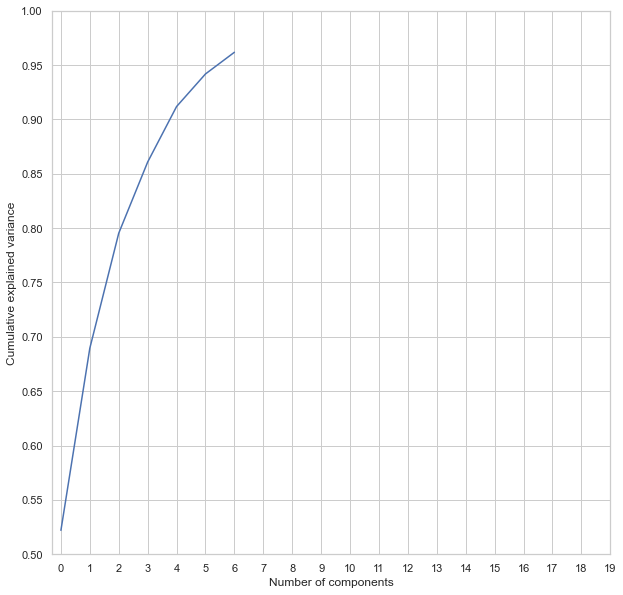

In [134]:
id_variable = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr_axis_aspect_ratio', 'max_length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr_axis_rectangularity', 'max_length_rectangularity',
       'scaled_variance', 'scaled_variance_1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration_1', 'skewness_about', 'skewness_about_1',
       'skewness_about_2', 'hollows_ratio']
dp_varaible = ["class"]

X = data_imp[id_variable]
y = data_imp[dp_varaible]
X = StandardScaler().fit_transform(X)

# set the value as 0.95 to capture the 95% of the variance in the data
pca = PCA(0.95,random_state=123) 
X_pca_value = pca.fit_transform(X)

fig,ax = plt.subplots(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
ax.set_xticks(range(0,20))
ax.set_yticks(np.arange(0.5, 1.05, 0.05))
plt.show()



In [135]:
m6_metrics_data = pd.DataFrame(columns=["C","gamma"])
sfk = StratifiedKFold(n_splits=5,random_state=123)

X_train, X_test, y_train, y_test = train_test_split(X_pca_value, y, test_size=0.3, random_state=123)

for C in [1, 10, 100]:    
    for gamma in [0.1,0.01,0.001, 0.0001]: 
      print("C = ",C,"::","gamma = ",gamma )
      model = SVC(C=C,gamma =gamma,random_state=101)
      model.fit(X_train,y_train) 
      print("Train Score", model.score(X_train,y_train))
      print("Test Score",model.score(X_test,y_test))
      metrics_dic = dict()
      metrics_dic = {"C":C,"gamma":gamma,
                     "PCA_M6_TRAIN_SCORE":model.score(X_train,y_train),
                     "PCA_M6_TEST_SCORE":model.score(X_test,y_test)}
      #print(metrics_dic)
      m6_metrics_data = m6_metrics_data.append(metrics_dic,ignore_index=True)       

m6_metrics_data

C =  1 :: gamma =  0.1
Train Score 0.9489795918367347
Test Score 0.9166666666666666
C =  1 :: gamma =  0.01
Train Score 0.8673469387755102
Test Score 0.8571428571428571
C =  1 :: gamma =  0.001
Train Score 0.5187074829931972
Test Score 0.4880952380952381
C =  1 :: gamma =  0.0001
Train Score 0.5153061224489796
Test Score 0.4801587301587302
C =  10 :: gamma =  0.1
Train Score 0.9795918367346939
Test Score 0.9285714285714286
C =  10 :: gamma =  0.01
Train Score 0.9285714285714286
Test Score 0.9166666666666666
C =  10 :: gamma =  0.001
Train Score 0.8299319727891157
Test Score 0.8174603174603174
C =  10 :: gamma =  0.0001
Train Score 0.5204081632653061
Test Score 0.4880952380952381
C =  100 :: gamma =  0.1
Train Score 0.9982993197278912
Test Score 0.9126984126984127
C =  100 :: gamma =  0.01
Train Score 0.9489795918367347
Test Score 0.9444444444444444
C =  100 :: gamma =  0.001
Train Score 0.8826530612244898
Test Score 0.876984126984127
C =  100 :: gamma =  0.0001
Train Score 0.8163265306

,C,gamma,PCA_M6_TEST_SCORE,PCA_M6_TRAIN_SCORE
0,1.0,0.1000,0.916667,0.948980
1,1.0,0.0100,0.857143,0.867347
2,1.0,0.0010,0.488095,0.518707
3,1.0,0.0001,0.480159,0.515306
4,10.0,0.1000,0.928571,0.979592
5,10.0,0.0100,0.916667,0.928571
6,10.0,0.0010,0.817460,0.829932
7,10.0,0.0001,0.488095,0.520408
8,100.0,0.1000,0.912698,0.998299
9,100.0,0.0100,0.944444,0.948980


###### PCA + StratifiedKFold ( split = 5 ) 

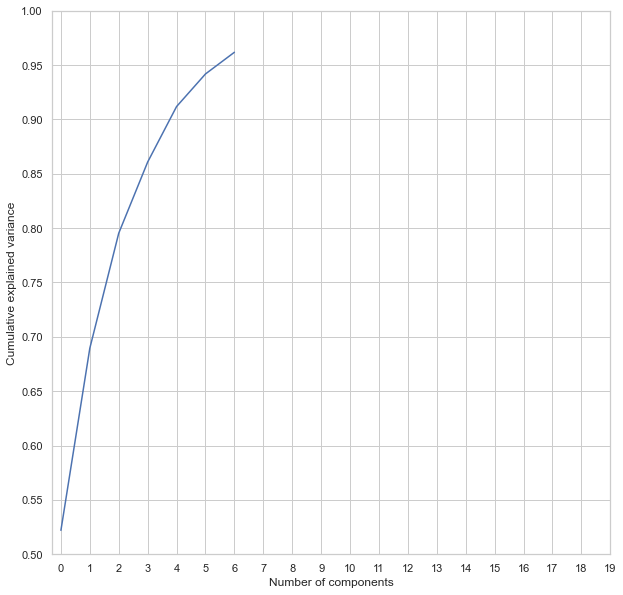

In [136]:
id_variable = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr_axis_aspect_ratio', 'max_length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr_axis_rectangularity', 'max_length_rectangularity',
       'scaled_variance', 'scaled_variance_1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration_1', 'skewness_about', 'skewness_about_1',
       'skewness_about_2', 'hollows_ratio']
dp_varaible = ["class"]

X = data_imp[id_variable]
y = data_imp[dp_varaible]
X = StandardScaler().fit_transform(X)

# set the value as 0.95 to capture the 95% of the variance in the data
pca = PCA(0.95,random_state=123) 
X_pca_value = pca.fit_transform(X)

fig,ax = plt.subplots(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
ax.set_xticks(range(0,20))
ax.set_yticks(np.arange(0.5, 1.05, 0.05))
plt.show()





In [137]:
m7_metrics_data = pd.DataFrame(columns=["C","gamma"])
sfk = StratifiedKFold(n_splits=5,random_state=123)

for C in [1, 10, 100]:    
    for gamma in [0.1,0.01,0.001, 0.0001]: 
      print("C = ",C,"::","gamma = ",gamma )
      train_accuracy = []
      test_accuracy = []
      for train_index,test_index in sfk.split(X_pca_value,y):
        X_train,X_test = X_pca_value[train_index],X_pca_value[test_index]
        y_train,y_test = y.iloc[train_index],y.iloc[test_index]
        model = SVC(C=C,gamma =gamma,random_state=101)
        model.fit(X_train,y_train)
        train_accuracy.append(model.score(X_train,y_train))
        test_accuracy.append(model.score(X_test,y_test))
      metrics_dic = dict()
      metrics_dic = {"C":C,
                         "gamma":gamma,
                         "PCA_M7_TRAIN_MEAN_SCORE":np.mean(train_accuracy),
                         "PCA_M7_TRAIN_STD_SCORE":np.std(train_accuracy),
                         "PCA_M7_TEST_MEAN_SCORE":np.mean(test_accuracy),
                         "PCA_M7_TEST_STD_SCORE":np.std(test_accuracy)}
      m7_metrics_data = m7_metrics_data.append(metrics_dic,ignore_index=True)                      
      print(train_accuracy)                    
      print(test_accuracy) 

m7_metrics_data

C =  1 :: gamma =  0.1
[0.9464285714285714, 0.9494047619047619, 0.9494047619047619, 0.9538690476190477, 0.9464285714285714]
[0.9345238095238095, 0.9345238095238095, 0.9523809523809523, 0.9047619047619048, 0.9047619047619048]
C =  1 :: gamma =  0.01
[0.8690476190476191, 0.8616071428571429, 0.8675595238095238, 0.8735119047619048, 0.8735119047619048]
[0.8809523809523809, 0.8630952380952381, 0.8690476190476191, 0.8452380952380952, 0.8392857142857143]
C =  1 :: gamma =  0.001
[0.5550595238095238, 0.5163690476190477, 0.5133928571428571, 0.5104166666666666, 0.5104166666666666]
[0.5238095238095238, 0.5059523809523809, 0.5059523809523809, 0.5119047619047619, 0.5119047619047619]
C =  1 :: gamma =  0.0001
[0.5044642857142857, 0.5044642857142857, 0.5059523809523809, 0.5044642857142857, 0.5044642857142857]
[0.5059523809523809, 0.5059523809523809, 0.5, 0.5059523809523809, 0.5059523809523809]
C =  10 :: gamma =  0.1
[0.9776785714285714, 0.9806547619047619, 0.9732142857142857, 0.9806547619047619, 0.98

,C,gamma,PCA_M7_TEST_MEAN_SCORE,PCA_M7_TEST_STD_SCORE,PCA_M7_TRAIN_MEAN_SCORE,PCA_M7_TRAIN_STD_SCORE
0,1.0,0.1000,0.926190,0.018672,0.949107,0.002728
1,1.0,0.0100,0.859524,0.015338,0.869048,0.004414
2,1.0,0.0010,0.511905,0.006521,0.521131,0.017107
3,1.0,0.0001,0.504762,0.002381,0.504762,0.000595
4,10.0,0.1000,0.933333,0.018211,0.978869,0.003178
5,10.0,0.0100,0.909524,0.020412,0.929464,0.006954
6,10.0,0.0010,0.815476,0.014580,0.826190,0.004553
7,10.0,0.0001,0.513095,0.008748,0.520536,0.016608
8,100.0,0.1000,0.922619,0.018443,0.996429,0.002019
9,100.0,0.0100,0.932143,0.017897,0.953869,0.004890


#### Model Comparasion

In [138]:
m_metrics_data = m1_metrics_data.join([m2_metrics_data.drop(columns = ["C","gamma"]),
                                       m3_metrics_data.drop(columns = ["C","gamma"])
                                       ,m4_metrics_data.drop(columns = ["C","gamma"])
                                       ,m5_metrics_data.drop(columns = ["C","gamma"])
                                       ,m6_metrics_data.drop(columns = ["C","gamma"])
                                       ,m7_metrics_data.drop(columns = ["C","gamma"])])
m_metrics_data.T

,0,1,2,3,4,5,6,7,8,9,10,11
C,1.000000,1.000000,1.000000,1.000000,10.000000,10.000000,10.000000,10.000000,100.000000,100.000000,100.000000,100.000000
gamma,0.100000,0.010000,0.001000,0.000100,0.100000,0.010000,0.001000,0.000100,0.100000,0.010000,0.001000,0.000100
M1_TEST_SCORE,0.944444,0.920635,0.488095,0.480159,0.960317,0.964286,0.896825,0.488095,0.948413,0.968254,0.944444,0.880952
M1_TRAIN_SCORE,0.984694,0.947279,0.520408,0.515306,1.000000,0.982993,0.935374,0.520408,1.000000,0.996599,0.974490,0.923469
M2_TEST_SCORE,0.940476,0.936508,0.484127,0.480159,0.956349,0.968254,0.904762,0.484127,0.960317,0.976190,0.952381,0.892857
M2_TRAIN_SCORE,0.988095,0.954082,0.522109,0.515306,1.000000,0.986395,0.937075,0.522109,1.000000,0.996599,0.972789,0.913265
M3_TEST_MEAN_SCORE,0.965476,0.936905,0.540476,0.504762,0.977381,0.973810,0.913095,0.542857,0.979762,0.982143,0.960714,0.900000
M3_TEST_STD_SCORE,0.011542,0.007143,0.021095,0.002381,0.006942,0.002916,0.018672,0.021095,0.010378,0.006521,0.002916,0.023928
M3_TRAIN_MEAN_SCORE,0.981845,0.941667,0.551190,0.504762,0.999107,0.978274,0.923810,0.551786,1.000000,0.994345,0.965774,0.908631
M3_TRAIN_STD_SCORE,0.002560,0.004037,0.035448,0.000595,0.000729,0.001190,0.001735,0.035483,0.000000,0.001458,0.002662,0.003835


Observation :

 - With multiple iterations best hyperparameters - {C:100, gamma:0.01}

In [139]:
m_metrics_data.query("(C == 100) & (gamma == 0.01)")

,C,gamma,M1_TEST_SCORE,M1_TRAIN_SCORE,M2_TEST_SCORE,M2_TRAIN_SCORE,M3_TEST_MEAN_SCORE,M3_TEST_STD_SCORE,M3_TRAIN_MEAN_SCORE,M3_TRAIN_STD_SCORE,M4_TEST_MEAN_SCORE,M4_TEST_STD_SCORE,M4_TRAIN_MEAN_SCORE,M4_TRAIN_STD_SCORE,M5_TEST_MEAN_SCORE,M5_TEST_STD_SCORE,M5_TRAIN_MEAN_SCORE,M5_TRAIN_STD_SCORE,PCA_M6_TEST_SCORE,PCA_M6_TRAIN_SCORE,PCA_M7_TEST_MEAN_SCORE,PCA_M7_TEST_STD_SCORE,PCA_M7_TRAIN_MEAN_SCORE,PCA_M7_TRAIN_STD_SCORE
9,100.0,0.01,0.968254,0.996599,0.97619,0.996599,0.982143,0.006521,0.994345,0.001458,0.984524,0.002916,0.995536,0.000941,0.963095,0.009524,0.977083,0.001518,0.944444,0.94898,0.932143,0.017897,0.953869,0.00489


Observation :
 - With the hyperparameter - {C:100, gamma:0.01}
  - For Model 1 ( train / Test + no imputation )  test accuracy score - 97%
  - For Model 2 ( train / Test + with imputation ) test accuracy score - 98% 
  - For Model 3 ( KFold  + no imputation ) mean test accuracy score - 98% [Standard Deviation - 0.0065 ]
  - For Model 4  ( KFold  + with imputation ) mean test accuracy score - 98% [Standard Deviation - 0.0029 ]
  - For Model 5 ( KFold + High correlation columns removed using VIF ) mean test accuracy score - 96% [Standard Deviation -  0.0095]
  - Model 6 ( PCA [ capturing  95% of variance ]  + train/test ) - 94%
  - Model 7 ( PCA [ capturing  95% of variance ]  + KFold ) - mean  test accuracy score - 93% [ Standard Deviation -  0.017]
- **With dimension reduction using PCA , we see the accuracy difference of 3 - 5 % with raw data.**

In [140]:
id_variable = ['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr_axis_aspect_ratio', 'max_length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr_axis_rectangularity', 'max_length_rectangularity',
       'scaled_variance', 'scaled_variance_1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration_1', 'skewness_about', 'skewness_about_1',
       'skewness_about_2', 'hollows_ratio']
dp_varaible = ["class"]

X = data_imp[id_variable]
y = data_imp[dp_varaible]
X = StandardScaler().fit_transform(X)
sfk = StratifiedKFold(n_splits=5,random_state=123)


pca_accuracy_score = []
pca_std_score = []
for varation in [0.95,0.96,0.97,0.98,0.99]:
  pca = PCA(varation,random_state=123) 
  X_pca_value = pca.fit_transform(X)

  test_accuracy = []
  test_sdt = []
  for train_index,test_index in sfk.split(X_pca_value,y):
    X_train,X_test = X_pca_value[train_index],X_pca_value[test_index]
    y_train,y_test = y.iloc[train_index],y.iloc[test_index]
    #X_train, X_test, y_train, y_test = train_test_split(X_pca_value, y, test_size=0.3, random_state=123)
    model = SVC(C=100,gamma =0.01,random_state=101)
    model.fit(X_train,y_train)
    test_accuracy.append(model.score(X_test,y_test))
  pca_accuracy_score.append(np.mean(test_accuracy))
  pca_std_score.append(np.std(test_accuracy))

pca_accuracy_score,pca_std_score


([0.9321428571428572,
  0.9321428571428572,
  0.9583333333333334,
  0.9619047619047618,
  0.9690476190476189],
 [0.017896781402824868,
  0.017896781402824868,
  0.013041013273932532,
  0.012256702548794048,
  0.01214052265141138])

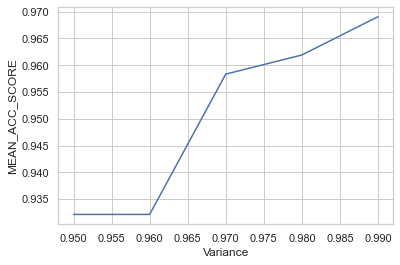

In [141]:
pca_score_df = pd.DataFrame(data={"Variance":[0.95,0.96,0.97,0.98,0.99],"MEAN_ACC_SCORE":pca_accuracy_score,"STD":pca_std_score})
sns.lineplot(data=pca_score_df,x="Variance",y="MEAN_ACC_SCORE")
plt.show()

Observation :

 - As expected , when we capture more variance ( 95% to 99% ) accuracy increases. 